In [ ]:
from __future__ import division
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
pool_size = multiprocessing.cpu_count()

# Functions to Optimize

## Sphere 

In [3]:
def sphere(x):
    """
    Sphere function (sum of squares).
    :param x: Input vector.
    :return: Value of sphere function on x.
    """
    x = np.array(x)
    return np.sum(x**2)

In [3]:
sphere([0, 0, 0 ])

0

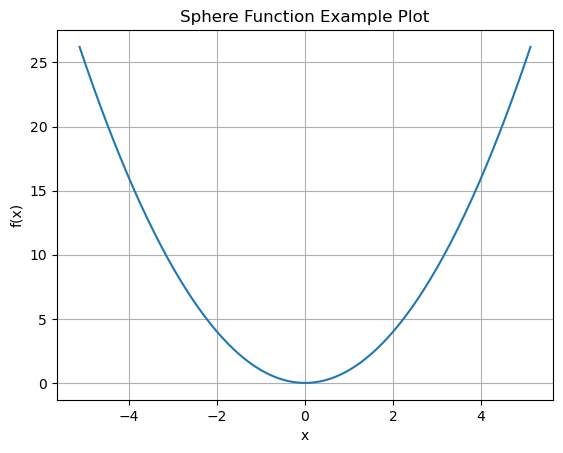

In [3]:
x = np.linspace(-5.12, 5.12, 200)
y = np.array([sphere([xi]) for xi in x]) 


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Sphere Function Example Plot')
plt.grid(True)
plt.show()

## Rosenbrock 

In [4]:
def rosenbrock(x):
    """
    Implement Rosenbrock function.
    :param x: Input vector.
    :return: Value of Rosenbrock function on x.
    """
    x = np.array(x)
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2) 

In [6]:
rosenbrock([1,1])

0.0

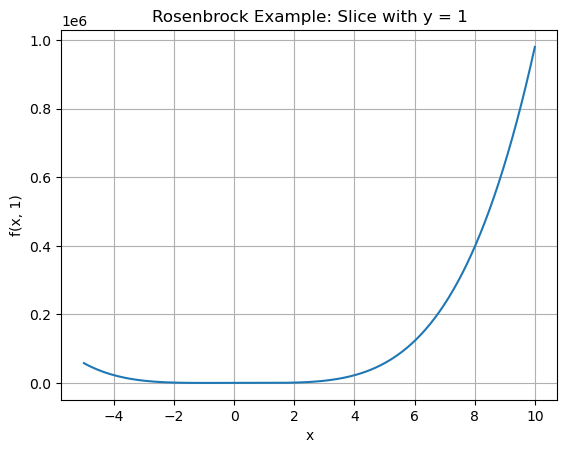

Minimum point: (1, 1)
Minimum value: 0


In [7]:
# Plotting Rosenbrock Slice with y = 1
x = np.linspace(-5, 10, 200)
y = np.array([rosenbrock([xi, 1]) for xi in x]) 


plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x, 1)')
plt.title('Rosenbrock Example: Slice with y = 1')
plt.grid(True)
plt.show()

# Using sympty to show global minima
import sympy as sp
x, y  = sp.symbols('x y')
f = 100 * (y - x**2)**2 + (1 - x)**2  # 2D Rosenbrock

# Computing derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

min_point = sp.solve([df_dx, df_dy], (x, y)) # Finding minima

# Printing minima
print("Minimum point:", min_point[0])
min_value = f.subs({x: min_point[0][0], y: min_point[0][1]})
print("Minimum value:", min_value)

## Rastigrin

In [39]:
def rastigrin(x):
    """
    Implement Rastigrin function.
    :param x: Input vector.
    :return: Value of Rastigrin function on x.
    """
    x = np.array(x)
    sum = np.sum (x**2 - 10 * np.cos(2*math.pi*x))
    
    return 10 * x.size + sum

In [9]:
rastigrin([0,0,0])

0.0

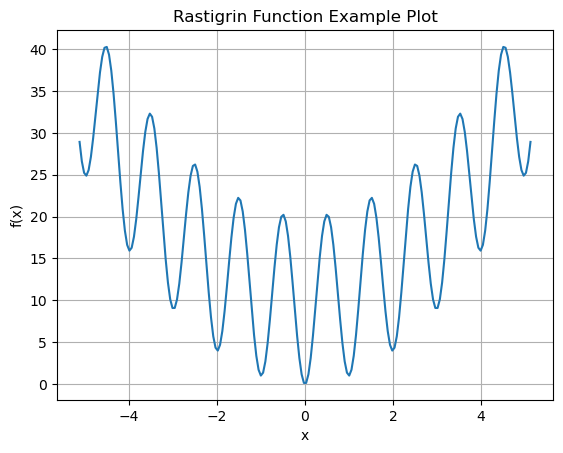

In [10]:
x = np.linspace(-5.12, 5.12, 200)
y = np.array([rastigrin([xi]) for xi in x]) 


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Rastigrin Function Example Plot')
plt.grid(True)
plt.show()


## Ackley

In [40]:
def ackley(x):
    """
    Implement Ackley function.
    :param x: Input vector.
    :return: Value of Rastigrin function on x.
    """
    
    x = np.array(x)

    mean_squared_sumx = np.sqrt(np.sum(x**2) /x.size)
    mean_cos_sumx = np.sum(np.cos(2*np.pi*x) /x.size)

    ackley_sum = -20 * np.exp(-0.2 * mean_squared_sumx) - np.exp(mean_cos_sumx) + 20 + np.e
    
    return ackley_sum

In [12]:
ackley([0, 0, 0])

4.440892098500626e-16

In [13]:
# Rounding because of floating point error

np.round(ackley([0, 0, 0]), 2)

0.0

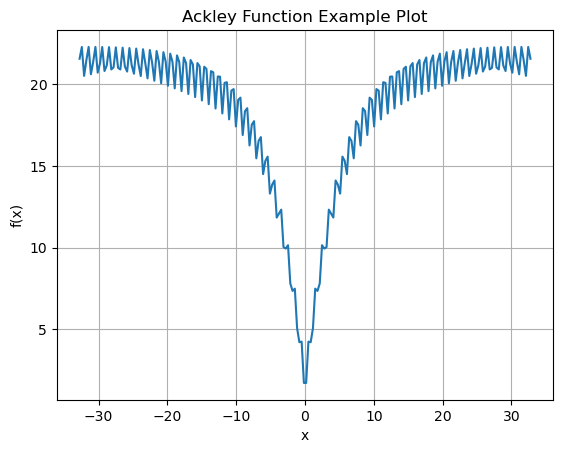

In [14]:
x = np.linspace(-32.768,32.768, 200)
y = np.array([ackley([xi]) for xi in x]) 


plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ackley Function Example Plot')
plt.grid(True)
plt.show()


# Particle Swarm Optimization Code

In [132]:
import random
import numpy as np

# These classes has been adapted from the code given in Lab 5

class Particle:
    """
    A particle in a swarm.
    """
    
    def __init__(self, bounds, num_dim):
        """
        Initialize a particle with random position and velocity, knowing bounds.
        
        :param bounds: List of bounds for each dimension.
        :param num_dim: Dimension
        """

        # sample positions uniformly in bounds
        self.position_i = [random.uniform(b[0], b[1]) for b in bounds]

        # sample velocities in ~10–20% of range.
        #self.velocity_i = [random.uniform(-0.2*(b[1]-b[0]), 0.2*(b[1]-b[0])) for b in bounds]
        
        self.velocity_i = [random.uniform(-rand*(b[1]-b[0]), rand*(b[1]-b[0])) 
                           for b, rand in zip(bounds, [random.uniform(0.1, 0.2) for _ in bounds])]

        

        # Define V_max to clamp velocities
        # Velocity clamp: ∣ 𝑣∣≤ 0.5 (upper − lower)
        self.V_max = [0.5 * (b[1] - b[0]) for b in bounds]

        
        self.num_dim = num_dim

        # best position individual
        self.pos_best_i = []

        # best error individual
        self.err_best_i=-1

        # error individual
        self.err_i=-1 
    

    
    def evaluate(self, function):
        """
        Evaluate a particle's current position, by calculating the value of its objective function.
        Update the particle's best position and error if the current position is better.

        :param function: Function to be optimized.
        """ 
        
        self.err_i = function(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self, pos_best_g, w, c1, c2, rng: np.random.RandomState):
        """
        Update particle's velocity based on constant inertia weight, cognitive constant, social constant, 
            personal best and global best. 

        :param pos_best_g: The global best position.
        :param w: Constant inertia weight (how much to weigh the previous velocity).
        :param c1: Cognitive constant.
        :param c2: Social constant.
        
        """ 
        

        for i in range(0,self.num_dim):
            r1 = rng.random()
            r2 = rng.random()

            vel_cognitive= c1* r1 *(self.pos_best_i[i] - self.position_i[i])
            vel_social= c2 * r2 * (pos_best_g[i] - self.position_i[i])
            
            velocity = w * self.velocity_i[i] + vel_cognitive + vel_social

            # Clamp Velocity using V_max
            if velocity > self.V_max[i]:
                velocity = self.V_max[i]
                
            if velocity < -self.V_max[i]:
                velocity = -self.V_max[i]
                
            self.velocity_i[i] = velocity

    def update_position(self, bounds):
        """
        Update particle's position based on current velocity and current position.

        :param bounds: List of bounds for each dimension.
        """ 
        
        for i in range(0, self.num_dim):
            
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i ]> bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]



class PSO():
    """
    Implement PSO (Particle Swarm Optimization) algorithm.
    """
    def __init__(self, num_dim, function, bounds, swarm_size, maxiter, w, c1, c2, early_stop_threshold):
        """
        Initialize PSO and swarm of particles.

        :param num_dim: Number of dimensions.
        :param function: Function to be optimized.
        :param bounds: List of bounds for each particle dimension.
        :param swarm_size: Number of particles in swarm.
        :param maxiter: Maximum number of iterations.
        :param w: Constant inertia weight (how much to weigh the previous velocity).
        :param c1: Cognitive constant.
        :param c2: Social constant.
        :param early_stop_threshold: Stop when min of function below a tiny threshold.
        """
        
        self.num_dim = num_dim
        self.function = function
        self.swarm_size = swarm_size
        self.maxiter = maxiter
        
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
        self.bounds = bounds

        self.swarm = [Particle(bounds, num_dim) for _ in range(swarm_size)]
        
        self.pos_best_g = []
        self.err_best_g = -1

        self.early_stop_threshold = early_stop_threshold
        
        self.err_best_g_history = []
        
        self.iterations = 0
        
        self.pbest_history = [[] for _ in range(self.swarm_size)] 

    def run(self, rng: np.random.RandomState):
        """
        Run the PSO algorithm.
        """
       
        # Begin optimization loop
        i=0
        
        while i < self.maxiter:
            #print i,err_best_g
            # Cycle through particles in swarm and evaluate fitness
            for j in range(0, self.swarm_size):
                
                self.swarm[j].evaluate(self.function)
                self.pbest_history[j].append(self.swarm[j].err_best_i)
                
                # Determine if current particle is the best (globally)
                if self.swarm[j].err_i < self.err_best_g or self.err_best_g == -1:
                    self.pos_best_g = list(self.swarm[j].position_i)
                    self.err_best_g = float(self.swarm[j].err_i)
                    self.err_best_g_history.append(self.err_best_g)

            # Cycle through swarm and update velocities and position
            for j in range(0, self.swarm_size):
                self.swarm[j].update_velocity(self.pos_best_g, self.w, self.c1, self.c2, rng)
                self.swarm[j].update_position(self.bounds)
            
            i += 1
            
            if self.err_best_g < self.early_stop_threshold:
                break
                
        self.iterations = i

# Sphere Optimization

In [133]:
# Parameters for all dimensions of Sphere Optimization

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_sphere = 10**(-8) # early stopping threshold

## Optimize Sphere in 2 dimensions

In [ ]:
def run_pso(pso, seed):
    """
    Runs a PSO instance with a given random seed. 
    Used for parallel execution.

    :param pso: PSO instance.
    :param seed: Seed for random generator for ensuring reproducibility.
    
    :return: PSO instance after execution.
    """

    rng = np.random.RandomState(seed)
    pso.run(rng)
    return pso

Final fitness stats for 2D Sphere over 30 runs:
Mean: 4.6e-09
Median: 5.0e-09
Best: 2.5e-10
Worst: 9.9e-09
Std Dev: 2.9e-09
Success Rate: 1.0 (100.0%) 


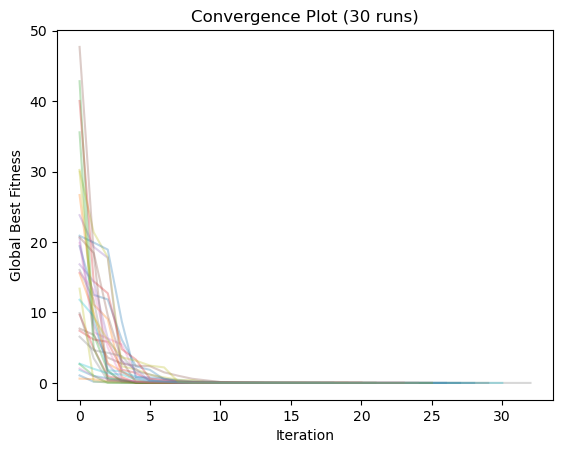

Number of iterations
Max iterations: 66
Min iterations 34
Mean iterations 57.43333333333333


In [18]:
# PSO over 30 runs

n = 2 # Number of dimensions
max_iter = 300 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_sphere = [(-5.12, 5.12)]*n # Bounds for each dimension of particles


all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)
        
        # Initialize PSO instance
        pso = PSO(num_dim = n, function = sphere, bounds = bounds_sphere, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_sphere)

        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_sphere)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 2D Sphere over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

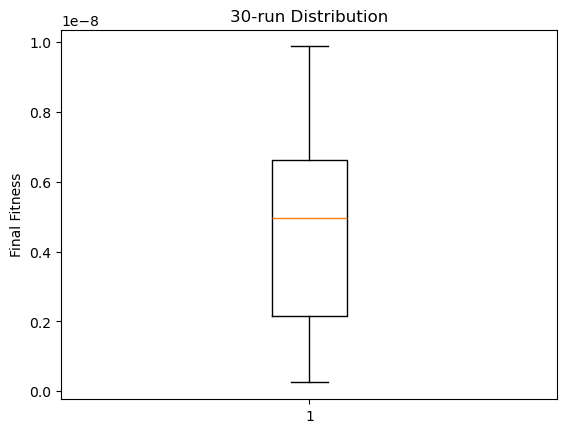

,Final Fitness
Run,
1,6.6e-10
2,3.9e-09
3,8.3e-09
4,8.0e-09
5,6.0e-10
6,4.9e-09
7,6.6e-09
8,3.2e-10
9,3.3e-10


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,6.6e-10,3.9e-09,8.3e-09,8.0e-09,6.0e-10,4.9e-09,6.6e-09,3.2e-10,3.3e-10,6.0e-09,...,8.7e-09,4.2e-09,4.4e-09,6.3e-10,8.2e-09,2.5e-10,5.8e-09,3.0e-09,9.9e-09,3.4e-10


In [19]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run' 

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [20]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,3.9e-05,5.4e-04,6.6e-10,3.9e-05,5.4e-04,1.1e-04
2,7.2e-06,1.2e-04,3.9e-09,7.2e-06,1.2e-04,2.3e-05
3,1.3e-04,2.1e-03,8.3e-09,1.3e-04,2.1e-03,3.9e-04
4,2.7e-06,3.3e-05,8.0e-09,2.7e-06,3.3e-05,6.4e-06
5,3.0e-05,3.6e-04,6.0e-10,3.0e-05,3.6e-04,7.5e-05
6,1.7e-05,2.5e-04,4.9e-09,1.7e-05,2.5e-04,5.1e-05
7,1.0e-04,2.3e-03,6.6e-09,1.0e-04,2.3e-03,4.3e-04
8,1.4e-05,2.2e-04,3.2e-10,1.4e-05,2.2e-04,4.2e-05
9,3.0e-03,8.0e-02,3.3e-10,3.0e-03,8.0e-02,1.4e-02



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,2.5e-04,4.7e-03
std,8.5e-04,1.7e-02
min,1.4e-06,1.9e-05
max,3.7e-03,8.0e-02


### Parameter Study: Sphere Optimization in 2 Dimensions

In [21]:
from itertools import product

# Parameter changes
w_values = [0.7, 0.4, 0.9]
c1_values = [1.5, 1.0, 2.0]
c2_values = [1.5, 1.0, 2.0]


all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        
        for run in range(n_runs):
            random.seed(run)
            pso = PSO(num_dim = n, function = sphere, bounds = bounds_sphere, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_sphere)
            
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)
            
        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })




df_param = pd.DataFrame(all_results)
pd.set_option('display.float_format', '{:.1e}'.format)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  

Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,11,25,2.1e+01,2.7e+00
1,0.4,1.0,1.5,16,26,2.3e+01,2.0e+00
2,0.4,1.0,2.0,18,30,2.4e+01,2.7e+00
3,0.4,1.5,1.0,11,25,2.1e+01,2.7e+00
4,0.4,1.5,1.5,16,26,2.3e+01,2.0e+00
5,0.4,1.5,2.0,18,30,2.4e+01,2.7e+00
6,0.4,2.0,1.0,11,25,2.1e+01,2.7e+00
7,0.4,2.0,1.5,16,26,2.3e+01,2.0e+00
8,0.4,2.0,2.0,18,30,2.4e+01,2.7e+00
9,0.7,1.0,1.0,37,58,5.3e+01,4.3e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,4.5e-09,3.0e-09,1.3e-10,9.9e-09
1,0.4,1.0,1.5,4.5e-09,2.9e-09,5.2e-10,9.7e-09
2,0.4,1.0,2.0,4.4e-09,2.6e-09,5.0e-10,8.8e-09
3,0.4,1.5,1.0,4.5e-09,3.0e-09,1.3e-10,9.9e-09
4,0.4,1.5,1.5,4.5e-09,2.9e-09,5.2e-10,9.7e-09
5,0.4,1.5,2.0,4.4e-09,2.6e-09,5.0e-10,8.8e-09
6,0.4,2.0,1.0,4.5e-09,3.0e-09,1.3e-10,9.9e-09
7,0.4,2.0,1.5,4.5e-09,2.9e-09,5.2e-10,9.7e-09
8,0.4,2.0,2.0,4.4e-09,2.6e-09,5.0e-10,8.8e-09
9,0.7,1.0,1.0,5.1e-09,2.6e-09,4.4e-10,9.6e-09


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,100.0
1,0.4,1.0,1.5,100.0
2,0.4,1.0,2.0,100.0
3,0.4,1.5,1.0,100.0
4,0.4,1.5,1.5,100.0
5,0.4,1.5,2.0,100.0
6,0.4,2.0,1.0,100.0
7,0.4,2.0,1.5,100.0
8,0.4,2.0,2.0,100.0
9,0.7,1.0,1.0,100.0


## Optimize Sphere in 10 dimensions

Final fitness stats for 10D Sphere over 30 runs:
Mean: 8.4e-09
Median: 8.7e-09
Best: 5.2e-09
Worst: 1.0e-08
Std Dev: 1.3e-09
Success Rate: 1.0 (100.0%) 


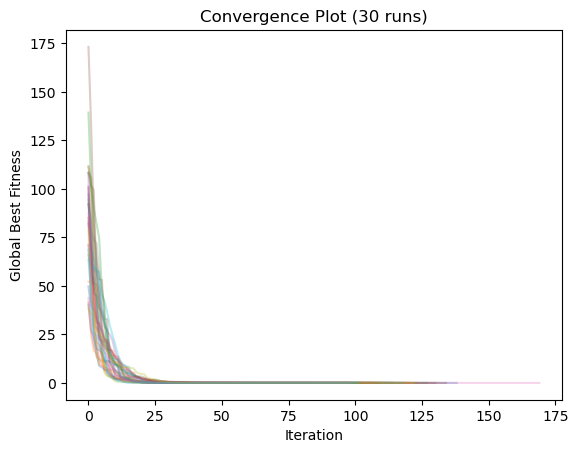

Number of iterations
Max iterations: 191
Min iterations 151
Mean iterations 167.0


In [ ]:
n = 10 # Number of dimensions
max_iter = 500 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_sphere = [(-5.12, 5.12)]*n # Bounds for each dimension of particles

# Parameters for all dimensions of Sphere Optimization

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_sphere = 10**(-8) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)
        
        # Initialize PSO instance
        pso = PSO(num_dim = n, function = sphere, bounds = bounds_sphere, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_sphere)

        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_sphere)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 10D Sphere over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

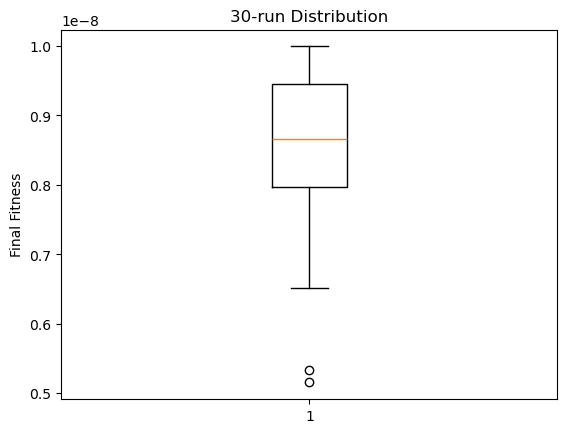

,Final Fitness
Run,
1,7.9e-09
2,9.9e-09
3,5.3e-09
4,8.6e-09
5,7.4e-09
6,8.7e-09
7,9.7e-09
8,1.0e-08
9,6.9e-09


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,7.9e-09,9.9e-09,5.3e-09,8.6e-09,7.4e-09,8.7e-09,9.7e-09,1.0e-08,6.9e-09,6.5e-09,...,9.4e-09,8.6e-09,9.7e-09,8.2e-09,5.2e-09,8.2e-09,6.8e-09,9.3e-09,8.4e-09,8.9e-09


In [23]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 

df.index.name = 'Run'  

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [24]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take last global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,1.4e-08,4.7e-08,7.9e-09,2.2e-08,5.5e-08,1.0e-08
2,2.0e-08,8.2e-08,9.9e-09,3.0e-08,9.2e-08,1.7e-08
3,2.6e-08,5.3e-08,5.3e-09,3.1e-08,5.9e-08,1.5e-08
4,9.0e-09,3.7e-08,8.6e-09,1.8e-08,4.5e-08,8.1e-09
5,2.5e-08,6.9e-08,7.4e-09,3.2e-08,7.6e-08,1.4e-08
6,2.5e-08,6.3e-08,8.7e-09,3.3e-08,7.2e-08,1.6e-08
7,3.6e-08,1.3e-07,9.7e-09,4.5e-08,1.4e-07,2.8e-08
8,2.1e-08,7.0e-08,1.0e-08,3.1e-08,8.0e-08,1.8e-08
9,1.2e-08,5.2e-08,6.9e-09,1.9e-08,5.9e-08,1.2e-08



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,2.0e-08,8.0e-08
std,1.0e-08,4.3e-08
min,7.1e-09,2.6e-08
max,6.2e-08,1.8e-07


### Parameter Study: Sphere Optimization in 10 Dimensions

In [25]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        
        for run in range(n_runs):
            random.seed(run)
            pso = PSO(num_dim = n, function = sphere, bounds = bounds_sphere, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_sphere)
            
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)
            
        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })
            

            
df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  

Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,500,500,5.0e+02,0.0e+00
1,0.4,1.0,1.5,500,500,5.0e+02,0.0e+00
2,0.4,1.0,2.0,88,500,3.5e+02,1.9e+02
3,0.4,1.5,1.0,500,500,5.0e+02,0.0e+00
4,0.4,1.5,1.5,500,500,5.0e+02,0.0e+00
5,0.4,1.5,2.0,88,500,3.5e+02,1.9e+02
6,0.4,2.0,1.0,500,500,5.0e+02,0.0e+00
7,0.4,2.0,1.5,500,500,5.0e+02,0.0e+00
8,0.4,2.0,2.0,88,500,3.5e+02,1.9e+02
9,0.7,1.0,1.0,108,159,1.2e+02,1.0e+01


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,8.9e-01,9.0e-01,1.1e-01,3.9e+00
1,0.4,1.0,1.5,3.1e-02,4.3e-02,5.7e-05,1.6e-01
2,0.4,1.0,2.0,4.8e-04,2.6e-03,3.6e-09,1.4e-02
3,0.4,1.5,1.0,8.9e-01,9.0e-01,1.1e-01,3.9e+00
4,0.4,1.5,1.5,3.1e-02,4.3e-02,5.7e-05,1.6e-01
5,0.4,1.5,2.0,4.8e-04,2.6e-03,3.6e-09,1.4e-02
6,0.4,2.0,1.0,8.9e-01,9.0e-01,1.1e-01,3.9e+00
7,0.4,2.0,1.5,3.1e-02,4.3e-02,5.7e-05,1.6e-01
8,0.4,2.0,2.0,4.8e-04,2.6e-03,3.6e-09,1.4e-02
9,0.7,1.0,1.0,8.0e-09,1.4e-09,4.5e-09,9.9e-09


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,40.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,40.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,40.0
9,0.7,1.0,1.0,100.0


## Optimize Sphere in 30 dimensions

Final fitness stats for 30D Sphere over 30 runs:
Mean: 2.6e+00
Median: 3.8e-06
Best: 7.8e-09
Worst: 2.6e+01
Std Dev: 7.9e+00
Success Rate: 0.16666666666666666 (16.666666666666664%) 


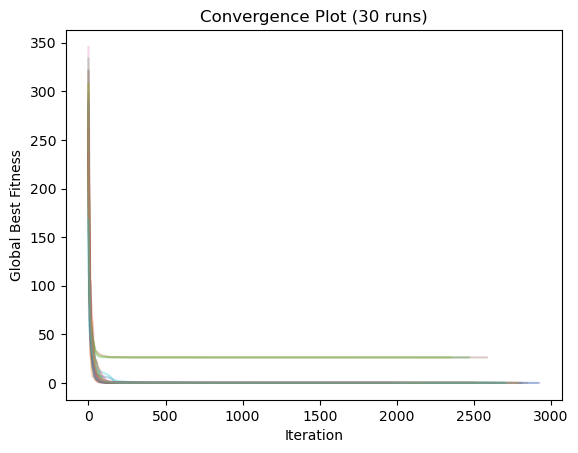

Number of iterations
Max iterations: 1000
Min iterations 840
Mean iterations 977.6


In [136]:
# PSO over 30 runs
n = 30 # Number of dimensions
max_iter = 1000 # Maximum Number of iterations
swarm_size = 50 # Swarm size
bounds_sphere = [(-5.12, 5.12)]*n # Bounds for each dimension of particles

# Parameters for all dimensions of Sphere Optimization

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_sphere = 10**(-8) # early stopping threshold   


all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)
        
        # Initialize PSO instance
        pso = PSO(num_dim = n, function = sphere, bounds = bounds_sphere, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_sphere)

        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result) 

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_sphere)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 30D Sphere over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

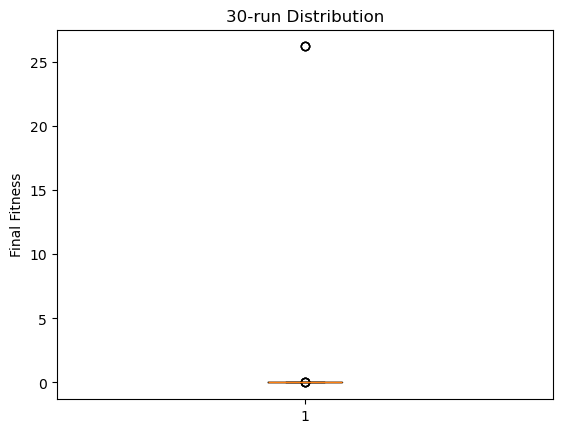

,Final Fitness
Run,
1,1.8e-06
2,1.6e-06
3,3.4e-06
4,4.9e-06
5,4.7e-06
6,2.6e+01
7,9.9e-09
8,1.2e-05
9,1.6e-04


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,1.8e-06,1.6e-06,3.4e-06,4.9e-06,4.7e-06,2.6e+01,9.9e-09,1.2e-05,1.6e-04,4.2e-06,...,7.8e-09,1.0e-08,2.6e+01,1.0e-08,9.9e-09,3.3e-03,6.6e-07,6.4e-03,9.2e-05,3.8e-07


In [27]:

# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run' 

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 

df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [28]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,4.5e-11,1.2e-10,1.8e-06,1.8e-06,1.8e-06,2.3e-11
2,1.9e-13,5.7e-13,1.6e-06,1.6e-06,1.6e-06,1.2e-13
3,1.7e-12,1.2e-11,3.4e-06,3.4e-06,3.4e-06,2.2e-12
4,6.8e-10,1.6e-09,4.9e-06,4.9e-06,4.9e-06,3.1e-10
5,1.0e-10,7.3e-10,4.7e-06,4.7e-06,4.7e-06,1.4e-10
6,4.3e-12,2.0e-11,2.6e+01,2.6e+01,2.6e+01,3.6e-12
7,5.7e-11,3.8e-10,9.9e-09,1.0e-08,1.0e-08,5.9e-11
8,2.5e-07,7.9e-07,1.2e-05,1.2e-05,1.2e-05,1.3e-07
9,6.4e-10,8.2e-09,1.6e-04,1.6e-04,1.6e-04,1.6e-09



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,1.2e-08,3.6e-08
std,4.8e-08,1.5e-07
min,4.3e-14,1.4e-13
max,2.5e-07,7.9e-07


### Parameter Study: Optimize Sphere in 30 dimensions

In [137]:
from itertools import product
import pandas as pd

# Parameter changes
w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        
        for run in range(n_runs):
            random.seed(run)
            pso = PSO(num_dim = n, function = sphere, bounds = bounds_sphere, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_sphere)
            
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)
            
        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })
            



df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,1000,1000,1000.000000,0.000000
1,0.4,1.0,1.5,1000,1000,1000.000000,0.000000
2,0.4,1.0,2.0,1000,1000,1000.000000,0.000000
3,0.4,1.5,1.0,1000,1000,1000.000000,0.000000
4,0.4,1.5,1.5,1000,1000,1000.000000,0.000000
5,0.4,1.5,2.0,1000,1000,1000.000000,0.000000
6,0.4,2.0,1.0,1000,1000,1000.000000,0.000000
7,0.4,2.0,1.5,1000,1000,1000.000000,0.000000
8,0.4,2.0,2.0,1000,1000,1000.000000,0.000000
9,0.7,1.0,1.0,1000,1000,1000.000000,0.000000


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,3.2e+01,1.0e+01,1.2e+01,5.2e+01
1,0.4,1.0,1.5,1.3e+01,6.6e+00,4.6e+00,3.4e+01
2,0.4,1.0,2.0,7.1e+00,9.3e+00,7.0e-01,3.1e+01
3,0.4,1.5,1.0,3.2e+01,1.0e+01,1.2e+01,5.2e+01
4,0.4,1.5,1.5,1.3e+01,6.6e+00,4.6e+00,3.4e+01
5,0.4,1.5,2.0,7.1e+00,9.3e+00,7.0e-01,3.1e+01
6,0.4,2.0,1.0,3.2e+01,1.0e+01,1.2e+01,5.2e+01
7,0.4,2.0,1.5,1.3e+01,6.6e+00,4.6e+00,3.4e+01
8,0.4,2.0,2.0,7.1e+00,9.3e+00,7.0e-01,3.1e+01
9,0.7,1.0,1.0,3.7e+00,9.0e+00,7.8e-03,2.6e+01


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


# RosenBrock Optimization

In [30]:
w = 0.7      
c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_rosenbrock = 10**(-8)

## Optimize Rosenbrock in 2 dimensions

Final fitness stats for 2D Rosenbrock over 30 runs:
Mean: 5.0e-09
Median: 5.3e-09
Best: 4.0e-10
Worst: 9.7e-09
Std Dev: 2.7e-09
Success Rate: 1.0 (100.0%) 


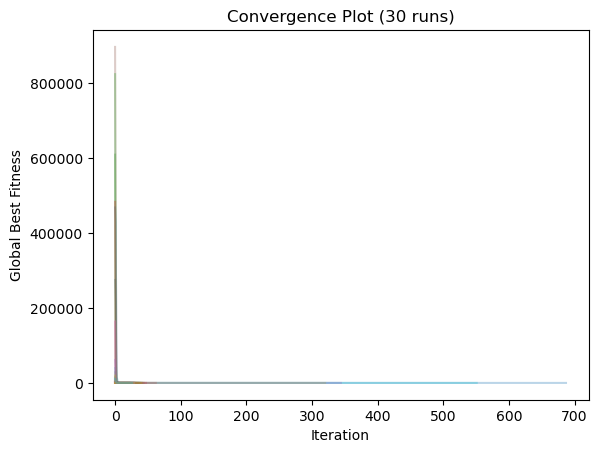

Number of iterations
Max iterations: 294
Min iterations 55
Mean iterations 106.76666666666667


In [31]:
# PSO over 30 runs
n = 2
swarm_size = 30
bounds_rosenbrock = [(-5, 10)]*n 
max_iter = 300

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rosenbrock, bounds = bounds_rosenbrock, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_rosenbrock)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rosenbrock)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 2D Rosenbrock over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

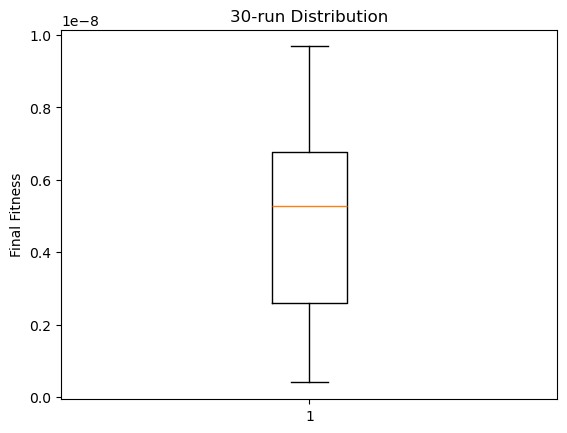

,Final Fitness
Run,
1,9.2e-09
2,1.7e-09
3,2.5e-09
4,5.8e-09
5,9.5e-09
6,9.4e-09
7,5.5e-09
8,6.9e-09
9,3.0e-09


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,9.2e-09,1.7e-09,2.5e-09,5.8e-09,9.5e-09,9.4e-09,5.5e-09,6.9e-09,3.0e-09,3.2e-09,...,3.5e-09,5.3e-09,6.8e-09,5.3e-09,3.5e-09,8.0e-09,1.7e-09,6.2e-09,8.0e-09,2.4e-09


In [32]:

# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1))


df.index.name = 'Run'  

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [33]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last (final) pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,1.2e-06,8.7e-06,9.2e-09,1.2e-06,8.7e-06,2.1e-06
2,2.3e-05,5.4e-04,1.7e-09,2.3e-05,5.4e-04,9.6e-05
3,1.0e-05,1.0e-04,2.5e-09,1.0e-05,1.0e-04,2.5e-05
4,9.6e-07,1.1e-05,5.8e-09,9.6e-07,1.1e-05,2.1e-06
5,1.5e-05,4.6e-04,9.5e-09,1.5e-05,4.6e-04,8.3e-05
6,7.5e-06,1.5e-04,9.4e-09,7.5e-06,1.5e-04,2.6e-05
7,1.9e-05,5.4e-04,5.5e-09,1.9e-05,5.4e-04,9.7e-05
8,3.7e-05,6.8e-04,6.9e-09,3.7e-05,6.8e-04,1.3e-04
9,8.8e-05,2.0e-03,3.0e-09,8.8e-05,2.0e-03,3.5e-04



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,3.6e-04,5.8e-03
std,1.6e-03,2.5e-02
min,1.6e-07,1.2e-06
max,8.6e-03,1.4e-01


## Parameter Study: Optimize Rosenbrock in 2 dimensions

In [34]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]


all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
            
            pso = PSO(num_dim = n, function = rosenbrock, bounds=bounds_rosenbrock, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_rosenbrock)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,300,300,3.0e+02,0.0e+00
1,0.4,1.0,1.5,35,300,2.8e+02,6.7e+01
2,0.4,1.0,2.0,31,300,2.5e+02,9.9e+01
3,0.4,1.5,1.0,300,300,3.0e+02,0.0e+00
4,0.4,1.5,1.5,35,300,2.8e+02,6.7e+01
5,0.4,1.5,2.0,31,300,2.5e+02,9.9e+01
6,0.4,2.0,1.0,300,300,3.0e+02,0.0e+00
7,0.4,2.0,1.5,35,300,2.8e+02,6.7e+01
8,0.4,2.0,2.0,31,300,2.5e+02,9.9e+01
9,0.7,1.0,1.0,51,300,1.4e+02,1.1e+02


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,7.6e-01,2.3e+00,4.2e-08,1.2e+01
1,0.4,1.0,1.5,8.5e-01,1.6e+00,8.9e-09,4.9e+00
2,0.4,1.0,2.0,1.4e-01,4.6e-01,3.3e-09,1.8e+00
3,0.4,1.5,1.0,7.6e-01,2.3e+00,4.2e-08,1.2e+01
4,0.4,1.5,1.5,8.5e-01,1.6e+00,8.9e-09,4.9e+00
5,0.4,1.5,2.0,1.4e-01,4.6e-01,3.3e-09,1.8e+00
6,0.4,2.0,1.0,7.6e-01,2.3e+00,4.2e-08,1.2e+01
7,0.4,2.0,1.5,8.5e-01,1.6e+00,8.9e-09,4.9e+00
8,0.4,2.0,2.0,1.4e-01,4.6e-01,3.3e-09,1.8e+00
9,0.7,1.0,1.0,4.1e-01,1.4e+00,1.2e-10,6.0e+00


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,6.7
2,0.4,1.0,2.0,20.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,6.7
5,0.4,1.5,2.0,20.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,6.7
8,0.4,2.0,2.0,20.0
9,0.7,1.0,1.0,70.0


## Optimize Rosenbrock in 10 dimensions

Final fitness stats for 10D Rosenbrock over 30 runs:
Mean: 2.5e+02
Median: 7.8e+00
Best: 1.1e-01
Worst: 2.5e+03
Std Dev: 6.5e+02
Success Rate: 0.0 (0.0%) 


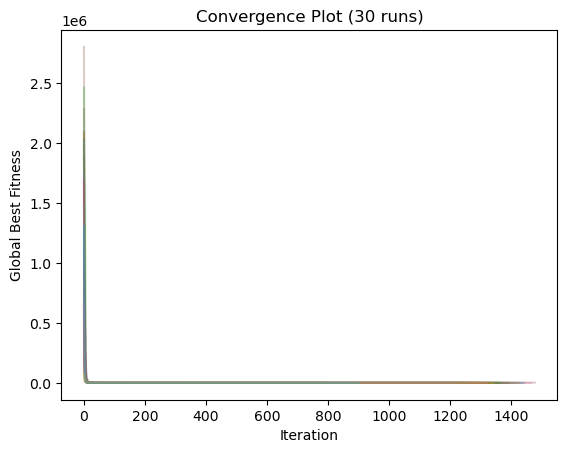

Number of iterations
Max iterations: 500
Min iterations 500
Mean iterations 500.0


In [51]:
# Dimension: 10
n = 10 # Number of dimensions
max_iter = 500 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_rosenbrock = [(-5.0, 10.0)]*n

# Parameters for all dimensions

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_rosenbrock = 10**(-8) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rosenbrock, bounds = bounds_rosenbrock, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_rosenbrock)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses < threshold_rosenbrock)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 10D Rosenbrock over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

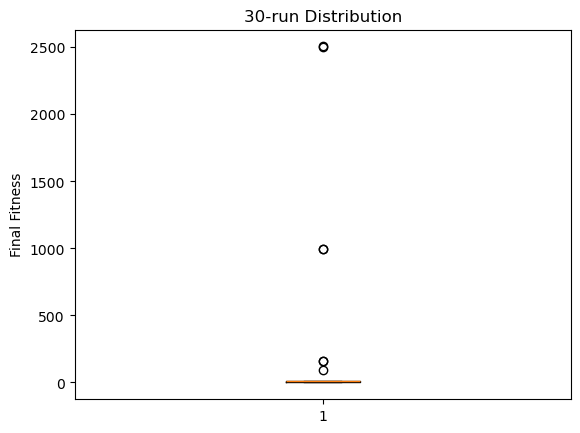

,Final Fitness
Run,
1,8.4e+00
2,3.5e+00
3,8.4e+00
4,4.2e+00
5,8.2e+00
6,4.4e+00
7,4.4e+00
8,3.7e+00
9,8.0e+00


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,8.4e+00,3.5e+00,8.4e+00,4.2e+00,8.2e+00,4.4e+00,4.4e+00,3.7e+00,8.0e+00,7.1e+00,...,6.2e+00,4.1e+00,8.4e+00,4.7e+00,1.6e+02,2.5e+03,9.9e+02,9.5e+00,1.0e+03,1.6e+02


In [36]:

# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run'  

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [37]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,7.9e-04,3.6e-03,8.4e+00,8.4e+00,8.4e+00,7.8e-04
2,2.4e-03,4.4e-03,3.5e+00,3.5e+00,3.5e+00,1.0e-03
3,2.4e-03,1.0e-02,8.4e+00,8.4e+00,8.4e+00,2.0e-03
4,7.3e-05,2.0e-04,4.2e+00,4.2e+00,4.2e+00,5.3e-05
5,4.3e-03,7.7e-03,8.2e+00,8.2e+00,8.2e+00,1.6e-03
6,1.5e-04,4.8e-04,4.4e+00,4.4e+00,4.4e+00,9.9e-05
7,1.9e-03,4.3e-03,4.4e+00,4.4e+00,4.4e+00,1.1e-03
8,1.3e-03,2.3e-03,3.7e+00,3.7e+00,3.7e+00,5.4e-04
9,4.1e-03,1.0e-02,8.0e+00,8.0e+00,8.0e+00,2.2e-03



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,1.2e-03,3.3e-03
std,1.3e-03,3.4e-03
min,3.2e-12,1.3e-11
max,4.3e-03,1.1e-02


### Parameter Study: Optimize Rosenbrock in 10 dimensions

In [38]:
from itertools import product

# Parameter changes
n = 10
w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
            
            pso = PSO(num_dim = n, function = rosenbrock, bounds=bounds_rosenbrock, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_rosenbrock)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  

Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,500,500,5.0e+02,0.0e+00
1,0.4,1.0,1.5,500,500,5.0e+02,0.0e+00
2,0.4,1.0,2.0,500,500,5.0e+02,0.0e+00
3,0.4,1.5,1.0,500,500,5.0e+02,0.0e+00
4,0.4,1.5,1.5,500,500,5.0e+02,0.0e+00
5,0.4,1.5,2.0,500,500,5.0e+02,0.0e+00
6,0.4,2.0,1.0,500,500,5.0e+02,0.0e+00
7,0.4,2.0,1.5,500,500,5.0e+02,0.0e+00
8,0.4,2.0,2.0,500,500,5.0e+02,0.0e+00
9,0.7,1.0,1.0,500,500,5.0e+02,0.0e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,4.4e+02,6.1e+02,1.4e+01,2.5e+03
1,0.4,1.0,1.5,3.1e+02,6.4e+02,7.9e+00,2.5e+03
2,0.4,1.0,2.0,1.4e+02,3.0e+02,4.9e-01,1.0e+03
3,0.4,1.5,1.0,4.4e+02,6.1e+02,1.4e+01,2.5e+03
4,0.4,1.5,1.5,3.1e+02,6.4e+02,7.9e+00,2.5e+03
5,0.4,1.5,2.0,1.4e+02,3.0e+02,4.9e-01,1.0e+03
6,0.4,2.0,1.0,4.4e+02,6.1e+02,1.4e+01,2.5e+03
7,0.4,2.0,1.5,3.1e+02,6.4e+02,7.9e+00,2.5e+03
8,0.4,2.0,2.0,1.4e+02,3.0e+02,4.9e-01,1.0e+03
9,0.7,1.0,1.0,1.6e+02,4.8e+02,5.1e+00,2.5e+03


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


### Test other parameters to find success rate > 0

Final fitness stats for 10D Rosenbrock over 30 runs:
Mean: 2.0e+03
Median: 3.9e-03
Best: 9.9e-09
Worst: 4.9e+04
Std Dev: 8.8e+03
Success Rate: 0.03333333333333333 (3.3333333333333335%) 


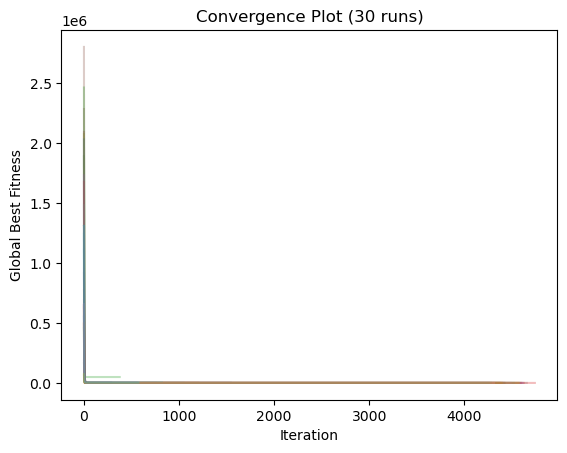

Number of iterations
Max iterations: 2400
Min iterations 2269
Mean iterations 2395.633333333333


In [82]:
# Dimension: 10
n = 10 # Number of dimensions
max_iter = 2400 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_rosenbrock = [(-5.0, 10.0)]*n

# Parameters for all dimensions

w = 0.5 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 2.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_rosenbrock = 10**(-8) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rosenbrock, bounds = bounds_rosenbrock, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_rosenbrock)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rosenbrock)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 10D Rosenbrock over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

## Optimize Rosenbrock in 30 dimensions

Final fitness stats for 30D Rosenbrock over 30 runs:
Mean: 5.9e+04
Median: 5.6e+04
Best: 2.2e+01
Worst: 2.6e+05
Std Dev: 5.3e+04
Success Rate: 0.0 (0.0%) 


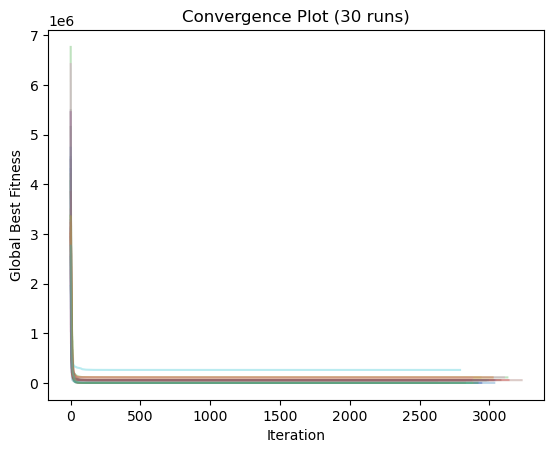

Number of iterations
Max iterations: 1000
Min iterations 1000
Mean iterations 1000.0


In [39]:
# Dimension: 30
n = 30 # Number of dimensions
swarm_size = 50 # Maximum Number of iterations
bounds_rosenbrock = [(-5.0, 10.0)]*n # Bounds for each dimension of particles
max_iter = 1000

# Parameters for all dimensions 

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_rosenbrock = 10**(-8) # early stopping threshold


all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rosenbrock, bounds = bounds_rosenbrock, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_rosenbrock)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rosenbrock)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 30D Rosenbrock over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

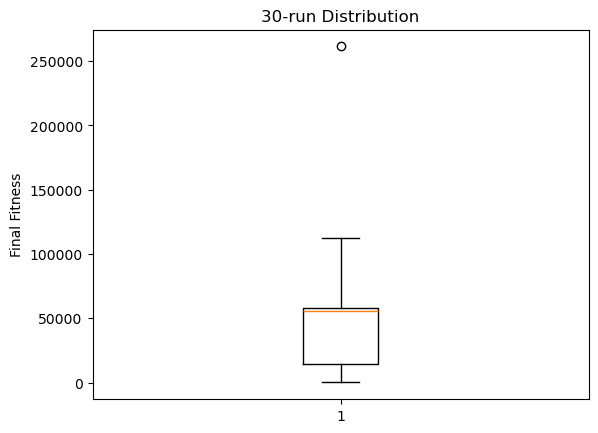

,Final Fitness
Run,
1,2.2e+01
2,1.1e+05
3,5.6e+04
4,2.6e+03
5,2.8e+01
6,5.6e+04
7,5.6e+04
8,4.9e+04
9,5.6e+04


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,2.2e+01,1.1e+05,5.6e+04,2.6e+03,2.8e+01,5.6e+04,5.6e+04,4.9e+04,5.6e+04,5.7e+04,...,7.9e+01,5.6e+04,8.4e+01,5.6e+04,5.6e+04,5.8e+04,1.1e+05,5.5e+04,1.8e+02,8.2e+01


In [40]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run'  # Name the index column

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [41]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,1.0e-05,2.9e-05,2.2e+01,2.2e+01,2.2e+01,6.3e-06
2,7.2e-05,1.7e-04,1.1e+05,1.1e+05,1.1e+05,3.3e-05
3,4.2e-06,2.8e-05,5.6e+04,5.6e+04,5.6e+04,6.4e-06
4,8.3e-05,1.7e-04,2.6e+03,2.6e+03,2.6e+03,4.4e-05
5,6.1e-04,1.7e-03,2.8e+01,2.8e+01,2.8e+01,3.3e-04
6,6.4e-04,1.8e-03,5.6e+04,5.6e+04,5.6e+04,3.9e-04
7,3.3e-06,8.2e-06,5.6e+04,5.6e+04,5.6e+04,2.0e-06
8,5.6e-03,1.2e-02,4.9e+04,4.9e+04,4.9e+04,2.8e-03
9,1.7e-07,5.4e-07,5.6e+04,5.6e+04,5.6e+04,9.6e-08



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,3.8e-04,9.6e-04
std,1.1e-03,2.5e-03
min,1.5e-09,4.2e-09
max,5.6e-03,1.2e-02


### Parameter Study: Optimize Rosenbrock in 30 dimensions

In [42]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
            
            pso = PSO(num_dim = n, function = rosenbrock, bounds=bounds_rosenbrock, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_rosenbrock)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,1000,1000,1.0e+03,0.0e+00
1,0.4,1.0,1.5,1000,1000,1.0e+03,0.0e+00
2,0.4,1.0,2.0,1000,1000,1.0e+03,0.0e+00
3,0.4,1.5,1.0,1000,1000,1.0e+03,0.0e+00
4,0.4,1.5,1.5,1000,1000,1.0e+03,0.0e+00
5,0.4,1.5,2.0,1000,1000,1.0e+03,0.0e+00
6,0.4,2.0,1.0,1000,1000,1.0e+03,0.0e+00
7,0.4,2.0,1.5,1000,1000,1.0e+03,0.0e+00
8,0.4,2.0,2.0,1000,1000,1.0e+03,0.0e+00
9,0.7,1.0,1.0,1000,1000,1.0e+03,0.0e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,9.7e+04,4.6e+04,3.5e+04,1.9e+05
1,0.4,1.0,1.5,6.4e+04,3.9e+04,5.7e+03,1.5e+05
2,0.4,1.0,2.0,6.3e+04,6.4e+04,1.2e+03,2.6e+05
3,0.4,1.5,1.0,9.7e+04,4.6e+04,3.5e+04,1.9e+05
4,0.4,1.5,1.5,6.4e+04,3.9e+04,5.7e+03,1.5e+05
5,0.4,1.5,2.0,6.3e+04,6.4e+04,1.2e+03,2.6e+05
6,0.4,2.0,1.0,9.7e+04,4.6e+04,3.5e+04,1.9e+05
7,0.4,2.0,1.5,6.4e+04,3.9e+04,5.7e+03,1.5e+05
8,0.4,2.0,2.0,6.3e+04,6.4e+04,1.2e+03,2.6e+05
9,0.7,1.0,1.0,4.1e+04,7.9e+04,1.7e+02,3.5e+05


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


# Rastigrin Optimization

In [43]:
w = 0.7      
c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_rastigrin = 10**(-4)

## Optimize Rastigrin in 2 dimensions

Final fitness stats for 2D Rastigrin over 30 runs:
Mean: 1.7e-01
Median: 7.2e-05
Best: 5.1e-06
Worst: 9.9e-01
Std Dev: 3.7e-01
Success Rate: 0.8333333333333334 (83.33333333333334%) 


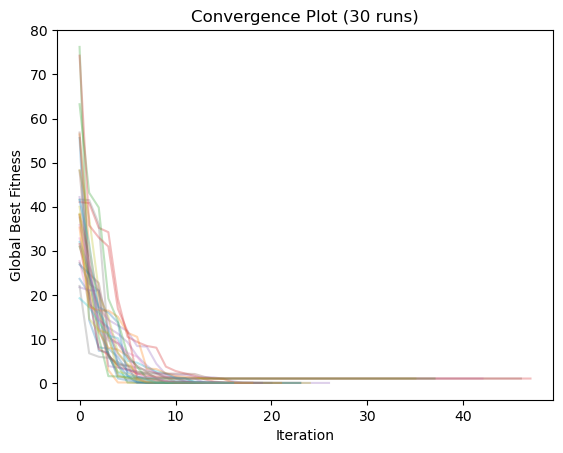

Number of iterations
Max iterations: 300
Min iterations 34
Mean iterations 89.96666666666667


In [44]:
# Dimension: 2
# PSO over 30 runs

n = 2 # Number of dimensions
max_iter = 300 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_rastigrin = [(-5.12, 5.12)]*n # Bounds for each dimension of particles



all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rastigrin, bounds = bounds_rastigrin, 
                swarm_size = swarm_size, maxiter=max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_rastigrin)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rastigrin)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 2D Rastigrin over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

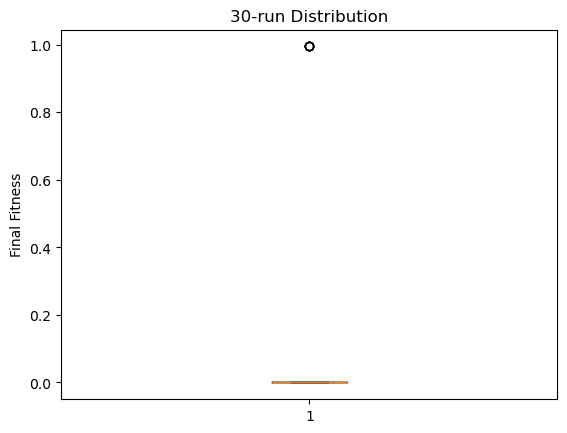

,Final Fitness
Run,
1,2.7e-05
2,1.9e-05
3,8.1e-05
4,9.5e-05
5,9.7e-05
6,2.5e-05
7,8.3e-05
8,1.1e-05
9,7.6e-05


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,2.7e-05,1.9e-05,8.1e-05,9.5e-05,9.7e-05,2.5e-05,8.3e-05,1.1e-05,7.6e-05,9.1e-05,...,1.7e-05,7.9e-05,9.9e-01,2.2e-05,8.7e-06,9.9e-01,4.2e-05,2.9e-05,3.6e-05,6.9e-05


In [45]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run' 

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [46]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last  pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,2.4e-01,2.0e+00,2.7e-05,2.4e-01,2.0e+00,4.4e-01
2,1.9e-01,1.9e+00,1.9e-05,1.9e-01,1.9e+00,3.8e-01
3,3.9e-02,8.6e-01,8.1e-05,3.9e-02,8.6e-01,1.5e-01
4,8.1e-02,1.3e+00,9.5e-05,8.1e-02,1.3e+00,2.4e-01
5,1.7e-01,3.4e+00,9.7e-05,1.7e-01,3.4e+00,6.1e-01
6,4.0e-01,6.6e+00,2.5e-05,4.0e-01,6.6e+00,1.3e+00
7,5.7e-01,3.3e+00,8.3e-05,5.7e-01,3.3e+00,8.2e-01
8,3.1e-02,4.7e-01,1.1e-05,3.1e-02,4.7e-01,9.5e-02
9,9.0e-03,1.0e-01,7.6e-05,9.0e-03,1.0e-01,2.1e-02



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,1.7e-01,1.6e+00
std,2.5e-01,1.9e+00
min,0.0e+00,0.0e+00
max,9.5e-01,6.6e+00


### Parameter Study: Optimize Rastigrin in 2 dimensions

In [47]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []


for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
            
            pso = PSO(num_dim = n, function = rastigrin, bounds=bounds_rastigrin, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_rastigrin)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,18,300,2.7e+02,8.6e+01
1,0.4,1.0,1.5,16,300,2.4e+02,1.1e+02
2,0.4,1.0,2.0,18,300,1.9e+02,1.4e+02
3,0.4,1.5,1.0,18,300,2.7e+02,8.6e+01
4,0.4,1.5,1.5,16,300,2.4e+02,1.1e+02
5,0.4,1.5,2.0,18,300,1.9e+02,1.4e+02
6,0.4,2.0,1.0,18,300,2.7e+02,8.6e+01
7,0.4,2.0,1.5,16,300,2.4e+02,1.1e+02
8,0.4,2.0,2.0,18,300,1.9e+02,1.4e+02
9,0.7,1.0,1.0,33,300,1.5e+02,1.3e+02


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,1.5e+00,1.6e+00,8.0e-06,9.0e+00
1,0.4,1.0,1.5,1.6e+00,1.8e+00,1.3e-05,9.0e+00
2,0.4,1.0,2.0,9.3e-01,1.6e+00,1.5e-05,9.0e+00
3,0.4,1.5,1.0,1.5e+00,1.6e+00,8.0e-06,9.0e+00
4,0.4,1.5,1.5,1.6e+00,1.8e+00,1.3e-05,9.0e+00
5,0.4,1.5,2.0,9.3e-01,1.6e+00,1.5e-05,9.0e+00
6,0.4,2.0,1.0,1.5e+00,1.6e+00,8.0e-06,9.0e+00
7,0.4,2.0,1.5,1.6e+00,1.8e+00,1.3e-05,9.0e+00
8,0.4,2.0,2.0,9.3e-01,1.6e+00,1.5e-05,9.0e+00
9,0.7,1.0,1.0,5.0e-01,6.3e-01,3.5e-06,2.0e+00


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


## Optimize Rastigrin in 10 dimensions

Final fitness stats for 10D Rastigrin over 30 runs:
Mean: 3.7e+01
Median: 3.7e+01
Best: 9.9e+00
Worst: 7.4e+01
Std Dev: 1.5e+01
Success Rate: 0.0 (0.0%) 


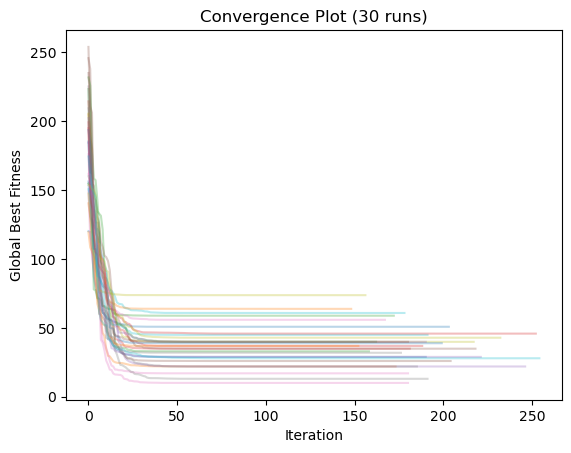

Number of iterations
Max iterations: 500
Min iterations 500
Mean iterations 500.0


In [48]:
# Dimension: 10
n = 10 # Number of dimensions
max_iter = 500 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_rastigrin = [(-5.12, 5.12)]*n # Bounds for each dimension of particles

# Parameters for all dimensions of Sphere Optimization

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_rastigrin = 10**(-4) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rastigrin, bounds = bounds_rastigrin, 
                swarm_size = swarm_size, maxiter=max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_rastigrin)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rastigrin)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 10D Rastigrin over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

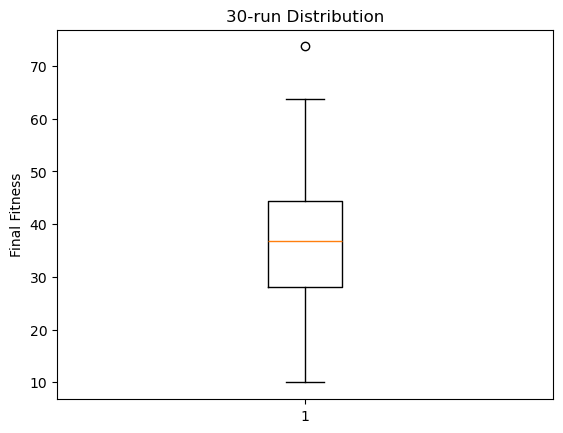

,Final Fitness
Run,
1,2.9e+01
2,2.2e+01
3,3.3e+01
4,3.5e+01
5,2.2e+01
6,2.6e+01
7,1.7e+01
8,1.3e+01
9,4.0e+01


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,2.9e+01,2.2e+01,3.3e+01,3.5e+01,2.2e+01,2.6e+01,1.7e+01,1.3e+01,4.0e+01,6.1e+01,...,3.9e+01,3.7e+01,4.0e+01,4.6e+01,4.0e+01,4.0e+01,5.6e+01,3.2e+01,4.3e+01,2.8e+01


In [49]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run'  # Name the index column

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [50]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,7.1e-15,0.0e+00,2.9e+01,2.9e+01,2.9e+01,7.1e-15
2,7.1e-15,0.0e+00,2.2e+01,2.2e+01,2.2e+01,7.1e-15
3,0.0e+00,0.0e+00,3.3e+01,3.3e+01,3.3e+01,0.0e+00
4,-7.1e-15,0.0e+00,3.5e+01,3.5e+01,3.5e+01,7.1e-15
5,1.1e-14,0.0e+00,2.2e+01,2.2e+01,2.2e+01,1.1e-14
6,7.1e-15,0.0e+00,2.6e+01,2.6e+01,2.6e+01,7.1e-15
7,3.6e-15,0.0e+00,1.7e+01,1.7e+01,1.7e+01,3.6e-15
8,0.0e+00,0.0e+00,1.3e+01,1.3e+01,1.3e+01,0.0e+00
9,7.1e-15,0.0e+00,4.0e+01,4.0e+01,4.0e+01,7.1e-15



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,-1.7e-15,0.0e+00
std,8.6e-15,0.0e+00
min,-1.4e-14,0.0e+00
max,1.4e-14,0.0e+00


### Parameter Study: Optimize Rastigrin in 10 dimensions

In [51]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
            
            pso = PSO(num_dim = n, function = rastigrin, bounds=bounds_rastigrin, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_rastigrin)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,500,500,5.0e+02,0.0e+00
1,0.4,1.0,1.5,500,500,5.0e+02,0.0e+00
2,0.4,1.0,2.0,500,500,5.0e+02,0.0e+00
3,0.4,1.5,1.0,500,500,5.0e+02,0.0e+00
4,0.4,1.5,1.5,500,500,5.0e+02,0.0e+00
5,0.4,1.5,2.0,500,500,5.0e+02,0.0e+00
6,0.4,2.0,1.0,500,500,5.0e+02,0.0e+00
7,0.4,2.0,1.5,500,500,5.0e+02,0.0e+00
8,0.4,2.0,2.0,500,500,5.0e+02,0.0e+00
9,0.7,1.0,1.0,500,500,5.0e+02,0.0e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,3.6e+01,1.0e+01,1.4e+01,5.4e+01
1,0.4,1.0,1.5,3.4e+01,1.5e+01,1.2e+01,8.2e+01
2,0.4,1.0,2.0,3.4e+01,1.7e+01,8.0e+00,9.7e+01
3,0.4,1.5,1.0,3.6e+01,1.0e+01,1.4e+01,5.4e+01
4,0.4,1.5,1.5,3.4e+01,1.5e+01,1.2e+01,8.2e+01
5,0.4,1.5,2.0,3.4e+01,1.7e+01,8.0e+00,9.7e+01
6,0.4,2.0,1.0,3.6e+01,1.0e+01,1.4e+01,5.4e+01
7,0.4,2.0,1.5,3.4e+01,1.5e+01,1.2e+01,8.2e+01
8,0.4,2.0,2.0,3.4e+01,1.7e+01,8.0e+00,9.7e+01
9,0.7,1.0,1.0,3.0e+01,1.4e+01,9.0e+00,6.2e+01


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


### Test other parameters to find success rate > 0

Final fitness stats for 10D Rastigrin over 30 runs:
Mean: 1.4e+01
Median: 5.5e-03
Best: 7.5e-05
Worst: 5.8e+01
Std Dev: 1.7e+01
Success Rate: 0.13333333333333333 (13.333333333333334%) 


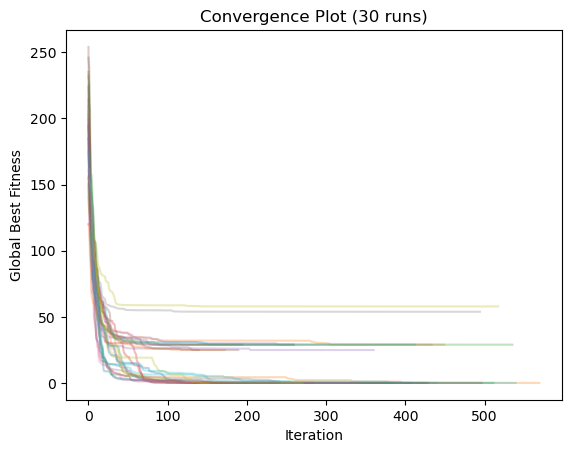

Number of iterations
Max iterations: 3000
Min iterations 2721
Mean iterations 2975.5666666666666


In [103]:
# Dimension: 10
n = 10 # Number of dimensions
max_iter = 3000 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_rastigrin = [(-5.12, 5.12)]*n # Bounds for each dimension of particles

# Parameters for all dimensions of Sphere Optimization

w = 0.9 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 3.0 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_rastigrin = 10**(-4) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rastigrin, bounds = bounds_rastigrin, 
                swarm_size = swarm_size, maxiter=max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_rastigrin)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rastigrin)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 10D Rastigrin over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

## Optimize Rastigrin in 30 dimensions

Final fitness stats for 30D Rastigrin over 30 runs:
Mean: 1.4e+02
Median: 1.4e+02
Best: 7.3e+01
Worst: 2.0e+02
Std Dev: 3.0e+01
Success Rate: 0.0 (0.0%) 


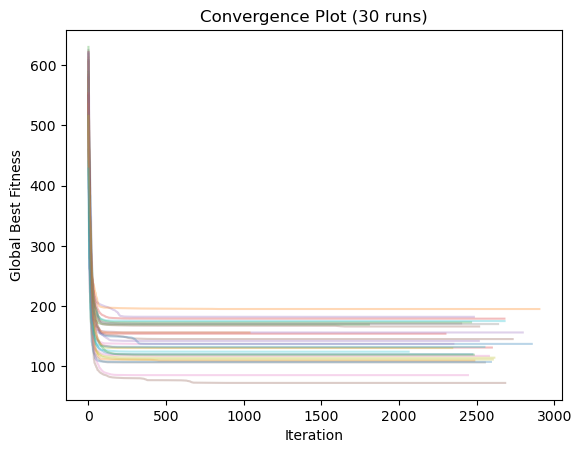

Number of iterations
Max iterations: 1000
Min iterations 1000
Mean iterations 1000.0


In [52]:
# Dimension: 30
# Dimension: 10
n = 30 # Number of dimensions
max_iter = 1000 # Maximum Number of iterations
swarm_size = 50 # Swarm size
bounds_rastigrin = [(-5.12, 5.12)]*n # Bounds for each dimension of particles

# Parameters for all dimensions 

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_rastigrin = 10**(-4) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = rastigrin, bounds = bounds_rastigrin, 
                swarm_size = swarm_size, maxiter=max_iter, 
                w = w, c1 = c1, c2=c2, early_stop_threshold = threshold_rastigrin)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_rastigrin)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 30D Rastigrin over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

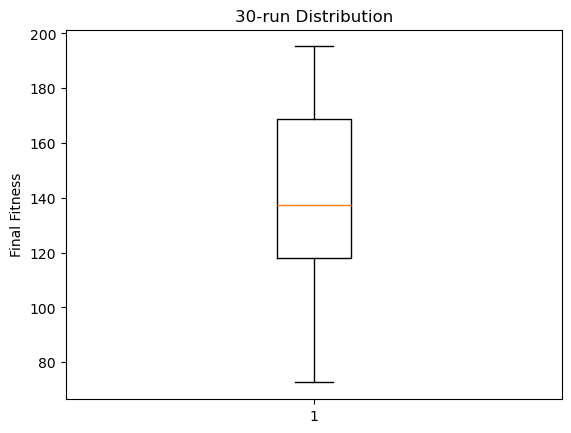

,Final Fitness
Run,
1,1.2e+02
2,1.1e+02
3,1.7e+02
4,1.5e+02
5,1.8e+02
6,1.5e+02
7,1.4e+02
8,1.7e+02
9,1.1e+02


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,1.2e+02,1.1e+02,1.7e+02,1.5e+02,1.8e+02,1.5e+02,1.4e+02,1.7e+02,1.1e+02,1.8e+02,...,1.4e+02,1.6e+02,1.2e+02,1.3e+02,1.4e+02,1.7e+02,8.6e+01,1.1e+02,1.3e+02,1.3e+02


In [53]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run'  

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [54]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,6.7e-12,2.3e-11,1.2e+02,1.2e+02,1.2e+02,4.8e-12
2,9.1e-10,3.4e-09,1.1e+02,1.1e+02,1.1e+02,8.4e-10
3,1.3e-11,3.7e-11,1.7e+02,1.7e+02,1.7e+02,9.2e-12
4,2.8e-13,1.1e-12,1.5e+02,1.5e+02,1.5e+02,2.0e-13
5,1.2e-11,4.9e-11,1.8e+02,1.8e+02,1.8e+02,9.5e-12
6,1.7e-11,4.7e-11,1.5e+02,1.5e+02,1.5e+02,8.5e-12
7,8.9e-12,3.6e-11,1.4e+02,1.4e+02,1.4e+02,6.5e-12
8,6.6e-12,1.9e-11,1.7e+02,1.7e+02,1.7e+02,4.4e-12
9,4.3e-11,1.2e-10,1.1e+02,1.1e+02,1.1e+02,2.5e-11



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,2.9e-09,1.0e-08
std,1.0e-08,3.5e-08
min,-2.8e-14,0.0e+00
max,5.0e-08,1.5e-07


### Parameter Study: Optimize Rastigrin in 30 dimensions

In [55]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []
for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
            
            pso = PSO(num_dim = n, function = rastigrin, bounds=bounds_rastigrin, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_rastigrin)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
        # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,1000,1000,1.0e+03,0.0e+00
1,0.4,1.0,1.5,1000,1000,1.0e+03,0.0e+00
2,0.4,1.0,2.0,1000,1000,1.0e+03,0.0e+00
3,0.4,1.5,1.0,1000,1000,1.0e+03,0.0e+00
4,0.4,1.5,1.5,1000,1000,1.0e+03,0.0e+00
5,0.4,1.5,2.0,1000,1000,1.0e+03,0.0e+00
6,0.4,2.0,1.0,1000,1000,1.0e+03,0.0e+00
7,0.4,2.0,1.5,1000,1000,1.0e+03,0.0e+00
8,0.4,2.0,2.0,1000,1000,1.0e+03,0.0e+00
9,0.7,1.0,1.0,1000,1000,1.0e+03,0.0e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,1.9e+02,2.9e+01,1.3e+02,2.4e+02
1,0.4,1.0,1.5,1.7e+02,2.9e+01,1.2e+02,2.4e+02
2,0.4,1.0,2.0,1.5e+02,4.0e+01,6.3e+01,2.5e+02
3,0.4,1.5,1.0,1.9e+02,2.9e+01,1.3e+02,2.4e+02
4,0.4,1.5,1.5,1.7e+02,2.9e+01,1.2e+02,2.4e+02
5,0.4,1.5,2.0,1.5e+02,4.0e+01,6.3e+01,2.5e+02
6,0.4,2.0,1.0,1.9e+02,2.9e+01,1.3e+02,2.4e+02
7,0.4,2.0,1.5,1.7e+02,2.9e+01,1.2e+02,2.4e+02
8,0.4,2.0,2.0,1.5e+02,4.0e+01,6.3e+01,2.5e+02
9,0.7,1.0,1.0,1.2e+02,2.5e+01,6.4e+01,1.7e+02


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


# Ackley Optimization

In [56]:
w = 0.7      
c1 = 1.5
c2 = 1.5
n_runs = 30
threshold_ackley = 10**(-4)

## Optimize Ackley in 2 Dimensions

Final fitness stats for 2D Ackley over 30 runs:
Mean: 6.6e-05
Median: 7.2e-05
Best: 1.9e-05
Worst: 9.8e-05
Std Dev: 2.3e-05
Success Rate: 1.0 (100.0%) 


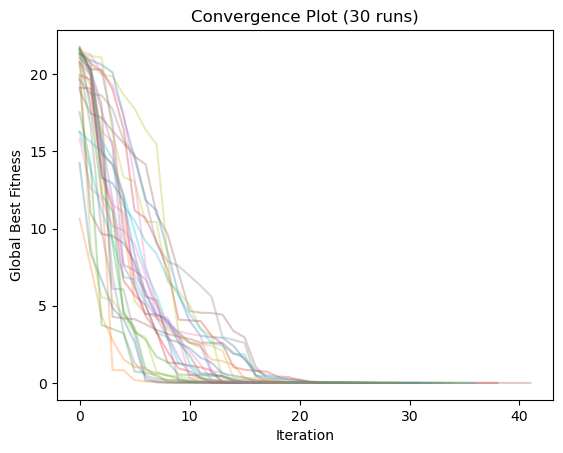

Number of iterations
Max iterations: 91
Min iterations 61
Mean iterations 78.83333333333333


In [57]:
# PSO over 30 runs

n = 2 # Number of dimensions
max_iter = 300 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_ackley= [(-32.768, 32.768)]*n # Bounds for each dimension of particles


all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = ackley, bounds = bounds_ackley, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_ackley)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_ackley)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 2D Ackley over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

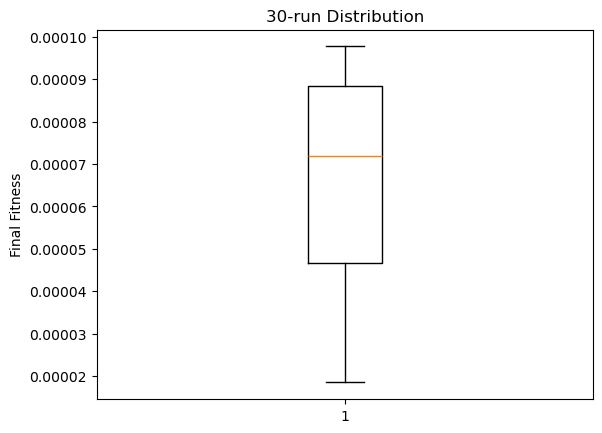

,Final Fitness
Run,
1,1.9e-05
2,9.3e-05
3,7.2e-05
4,5.4e-05
5,6.9e-05
6,5.6e-05
7,7.6e-05
8,9.6e-05
9,4.9e-05


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,1.9e-05,9.3e-05,7.2e-05,5.4e-05,6.9e-05,5.6e-05,7.6e-05,9.6e-05,4.9e-05,9.8e-05,...,4.0e-05,9.1e-05,2.2e-05,7.1e-05,4.3e-05,5.4e-05,9.0e-05,8.1e-05,9.1e-05,7.5e-05


In [58]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run' 

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [59]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,4.5e-02,2.9e-01,1.9e-05,4.5e-02,2.9e-01,6.2e-02
2,7.4e-03,6.5e-02,9.3e-05,7.5e-03,6.5e-02,1.2e-02
3,1.6e-02,1.3e-01,7.2e-05,1.6e-02,1.3e-01,2.8e-02
4,7.2e-03,4.2e-02,5.4e-05,7.3e-03,4.3e-02,1.0e-02
5,6.7e-03,7.0e-02,6.9e-05,6.8e-03,7.0e-02,1.4e-02
6,3.2e-03,1.5e-02,5.6e-05,3.3e-03,1.5e-02,3.9e-03
7,3.9e-02,8.3e-01,7.6e-05,3.9e-02,8.3e-01,1.5e-01
8,2.3e-03,1.3e-02,9.6e-05,2.4e-03,1.3e-02,3.1e-03
9,3.0e-02,6.5e-01,4.9e-05,3.0e-02,6.5e-01,1.2e-01



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,1.1e-02,1.1e-01
std,1.2e-02,1.9e-01
min,1.1e-03,4.3e-03
max,4.5e-02,8.3e-01


### Parameter Study: Optimize Ackley in 2 Dimensions

In [60]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
        
            pso = PSO(num_dim = n, function = ackley, bounds = bounds_ackley, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_ackley)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })



df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  

Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,26,32,2.9e+01,1.7e+00
1,0.4,1.0,1.5,25,34,3.2e+01,1.7e+00
2,0.4,1.0,2.0,29,39,3.5e+01,2.6e+00
3,0.4,1.5,1.0,26,32,2.9e+01,1.7e+00
4,0.4,1.5,1.5,25,34,3.2e+01,1.7e+00
5,0.4,1.5,2.0,29,39,3.5e+01,2.6e+00
6,0.4,2.0,1.0,26,32,2.9e+01,1.7e+00
7,0.4,2.0,1.5,25,34,3.2e+01,1.7e+00
8,0.4,2.0,2.0,29,39,3.5e+01,2.6e+00
9,0.7,1.0,1.0,61,78,7.1e+01,4.5e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,6.8e-05,2.7e-05,1.1e-05,9.9e-05
1,0.4,1.0,1.5,5.6e-05,2.8e-05,7.6e-06,9.9e-05
2,0.4,1.0,2.0,5.8e-05,2.2e-05,1.3e-05,9.4e-05
3,0.4,1.5,1.0,6.8e-05,2.7e-05,1.1e-05,9.9e-05
4,0.4,1.5,1.5,5.6e-05,2.8e-05,7.6e-06,9.9e-05
5,0.4,1.5,2.0,5.8e-05,2.2e-05,1.3e-05,9.4e-05
6,0.4,2.0,1.0,6.8e-05,2.7e-05,1.1e-05,9.9e-05
7,0.4,2.0,1.5,5.6e-05,2.8e-05,7.6e-06,9.9e-05
8,0.4,2.0,2.0,5.8e-05,2.2e-05,1.3e-05,9.4e-05
9,0.7,1.0,1.0,6.9e-05,2.4e-05,2.0e-05,9.9e-05


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


## Optimize Ackley in 10 dimensions

Final fitness stats for 10D Ackley over 30 runs:
Mean: 1.1e+00
Median: 1.2e+00
Best: 7.6e-05
Worst: 3.6e+00
Std Dev: 1.1e+00
Success Rate: 0.43333333333333335 (43.333333333333336%) 


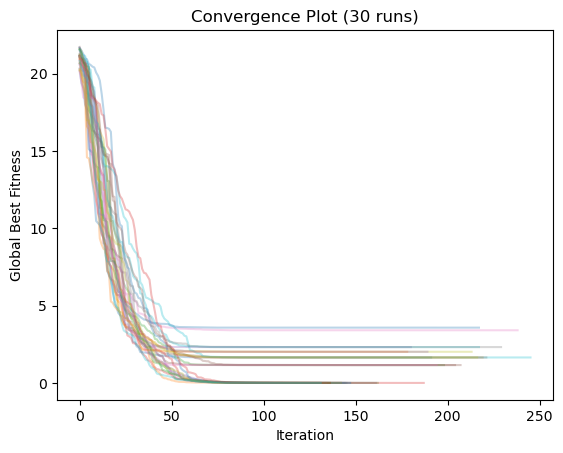

Number of iterations
Max iterations: 500
Min iterations 195
Mean iterations 373.7


In [61]:
# Dimension: 10
n = 10 # Number of dimensions
max_iter = 500 # Maximum Number of iterations
swarm_size = 30 # Swarm size
bounds_ackley= [(-32.768, 32.768)]*n # Bounds for each dimension of particles

# Parameters for all dimensions of Sphere Optimization

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_ackley = 10**(-4) # early stopping threshold

all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = ackley, bounds = bounds_ackley, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_ackley)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_ackley)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 10D Ackley over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

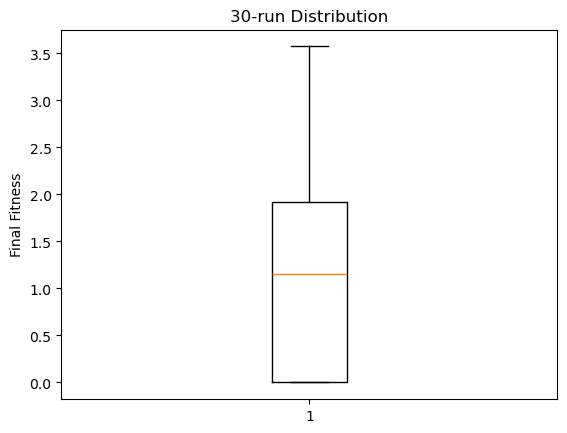

,Final Fitness
Run,
1,1.6e+00
2,1.6e+00
3,1.2e+00
4,9.0e-05
5,8.5e-05
6,1.6e+00
7,3.4e+00
8,7.6e-05
9,2.0e+00


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,1.6e+00,1.6e+00,1.2e+00,9.0e-05,8.5e-05,1.6e+00,3.4e+00,7.6e-05,2.0e+00,1.6e+00,...,8.9e-05,2.0e+00,9.9e-05,9.2e-05,2.0e+00,1.2e+00,1.2e+00,2.3e+00,1.6e+00,9.4e-05


In [62]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run'  

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [63]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,0.0e+00,0.0e+00,1.6e+00,1.6e+00,1.6e+00,0.0e+00
2,6.7e-16,0.0e+00,1.6e+00,1.6e+00,1.6e+00,6.7e-16
3,0.0e+00,0.0e+00,1.2e+00,1.2e+00,1.2e+00,0.0e+00
4,7.1e-05,2.3e-04,9.0e-05,1.6e-04,3.2e-04,4.5e-05
5,3.8e-05,8.7e-05,8.5e-05,1.2e-04,1.7e-04,2.0e-05
6,6.7e-16,0.0e+00,1.6e+00,1.6e+00,1.6e+00,6.7e-16
7,-8.9e-16,0.0e+00,3.4e+00,3.4e+00,3.4e+00,8.9e-16
8,6.0e-05,1.1e-04,7.6e-05,1.4e-04,1.9e-04,2.3e-05
9,8.9e-16,0.0e+00,2.0e+00,2.0e+00,2.0e+00,8.9e-16



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,2.3e-05,6.4e-05
std,2.9e-05,8.2e-05
min,-8.9e-16,0.0e+00
max,9.1e-05,2.3e-04


### Parameter Study: Optimize Ackley in 10 dimensions

In [64]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
        
            pso = PSO(num_dim = n, function = ackley, bounds = bounds_ackley, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_ackley)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  



Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,500,500,5.0e+02,0.0e+00
1,0.4,1.0,1.5,500,500,5.0e+02,0.0e+00
2,0.4,1.0,2.0,141,500,4.9e+02,6.6e+01
3,0.4,1.5,1.0,500,500,5.0e+02,0.0e+00
4,0.4,1.5,1.5,500,500,5.0e+02,0.0e+00
5,0.4,1.5,2.0,141,500,4.9e+02,6.6e+01
6,0.4,2.0,1.0,500,500,5.0e+02,0.0e+00
7,0.4,2.0,1.5,500,500,5.0e+02,0.0e+00
8,0.4,2.0,2.0,141,500,4.9e+02,6.6e+01
9,0.7,1.0,1.0,139,500,4.3e+02,1.4e+02


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,7.9e+00,3.4e+00,2.6e+00,1.4e+01
1,0.4,1.0,1.5,5.0e+00,2.4e+00,1.9e-01,1.0e+01
2,0.4,1.0,2.0,2.5e+00,1.5e+00,8.7e-05,5.7e+00
3,0.4,1.5,1.0,7.9e+00,3.4e+00,2.6e+00,1.4e+01
4,0.4,1.5,1.5,5.0e+00,2.4e+00,1.9e-01,1.0e+01
5,0.4,1.5,2.0,2.5e+00,1.5e+00,8.7e-05,5.7e+00
6,0.4,2.0,1.0,7.9e+00,3.4e+00,2.6e+00,1.4e+01
7,0.4,2.0,1.5,5.0e+00,2.4e+00,1.9e-01,1.0e+01
8,0.4,2.0,2.0,2.5e+00,1.5e+00,8.7e-05,5.7e+00
9,0.7,1.0,1.0,1.7e+00,2.3e+00,7.9e-05,1.3e+01


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


## Optimize Ackley in 30 dimensions

Final fitness stats for 30D Ackley over 30 runs:
Mean: 9.5e+00
Median: 8.9e+00
Best: 2.3e+00
Worst: 1.8e+01
Std Dev: 4.6e+00
Success Rate: 0.0 (0.0%) 


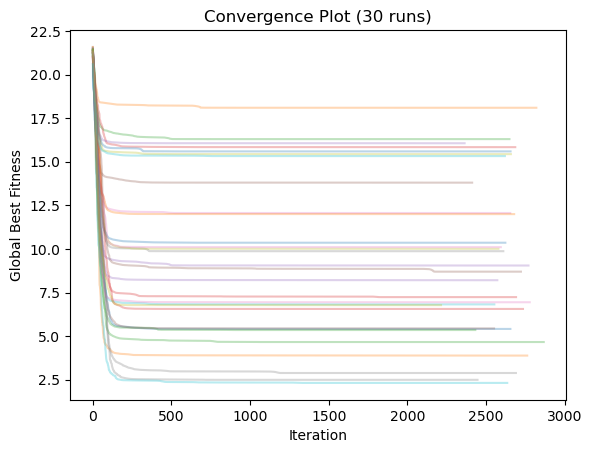

Number of iterations
Max iterations: 1000
Min iterations 1000
Mean iterations 1000.0


In [65]:
# Dimension: 30
# Dimension: 10
n = 30 # Number of dimensions
max_iter = 1000 # Maximum Number of iterations
swarm_size = 50 # Swarm size
bounds_ackley= [(-32.768, 32.768)]*n # Bounds for each dimension of particles

# Parameters for all dimensions of Sphere Optimization

w = 0.7 # constant inertia weight (how much to weigh the previous velocity)      
c1 = 1.5 # cognitive constant
c2 = 1.5 # social constant

n_runs = 30 # aggregate results over 30 runs

threshold_ackley = 10**(-4) # early stopping threshold
all_runs = []
results = []
with multiprocessing.Pool(processes=pool_size) as pool:
    for run in range(n_runs):
        random.seed(run)


        pso = PSO(num_dim = n, function = ackley, bounds = bounds_ackley, 
                swarm_size = swarm_size, maxiter = max_iter, 
                w = w, c1 = c1, c2 = c2, early_stop_threshold = threshold_ackley)
        res = pool.apply_async(run_pso, (pso,run,))
        results.append(res)

    for result in [res.get() for res in results]:
        run_result = {
            'final_fitness': result.err_best_g,
            'best_position': result.pos_best_g,
            'iterations': result.iterations,
            'fitness_history': result.err_best_g_history,
            'evaluations': result.iterations * swarm_size,
            'pbest_history': result.pbest_history
        }
        all_runs.append(run_result)

# Compute Statistics for Final Fitnesses
final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
best_final_fitness = np.min(final_fitnesses) # Best final fitness
worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
success_rate_final_fitness = np.sum(final_fitnesses <= threshold_ackley)/n_runs # Success rate: Number of sucessful runs/ no. of runs

# Print Statistics
print("Final fitness stats for 30D Ackley over 30 runs:")
print(f"Mean: {mean_final_fitness:.1e}")
print(f"Median: {median_final_fitness:.1e}")
print(f"Best: {best_final_fitness:.1e}")
print(f"Worst: {worst_final_fitness:.1e}")
print(f"Std Dev: {std_dev_final_fitness:.1e}")
print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")

# Convergence Plot for All Runs - Fitness history of all runs
# Since early stopping is added, no. of iterations can vary between runs
# Therefore plot each run individually
for run in all_runs:
    plt.plot(run['fitness_history'], alpha=0.3)
plt.xlabel('Iteration')
plt.ylabel('Global Best Fitness')
plt.title('Convergence Plot (30 runs)')
plt.show()

# Iterations
no_iterations =  np.array([run['iterations'] for run in all_runs]) 
min_iterations = np.min(no_iterations) # Min iterations
max_iterations = np.max(no_iterations) # Max iterations
mean_iterations = np.mean(no_iterations) # Mean iterations

print("Number of iterations")
print("Max iterations:", max_iterations)
print("Min iterations", min_iterations)
print("Mean iterations", mean_iterations)

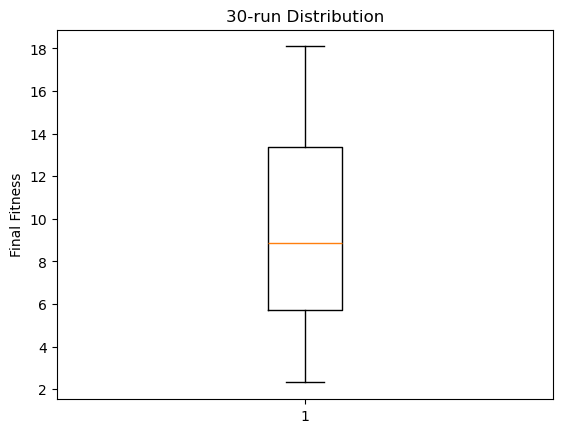

,Final Fitness
Run,
1,5.4e+00
2,3.9e+00
3,1.6e+01
4,7.2e+00
5,8.2e+00
6,1.4e+01
7,1.2e+01
8,9.9e+00
9,1.0e+01


Run,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Final Fitness,5.4e+00,3.9e+00,1.6e+01,7.2e+00,8.2e+00,1.4e+01,1.2e+01,9.9e+00,1.0e+01,6.8e+00,...,1.6e+01,1.2e+01,4.7e+00,6.6e+00,1.6e+01,8.7e+00,6.9e+00,2.9e+00,6.8e+00,1.5e+01


In [66]:
# BoxPlot to see distribution over 30 runs
plt.boxplot(final_fitnesses)
plt.ylabel('Final Fitness')
plt.title('30-run Distribution')
plt.show()


# Create Table with Final Fitness for each Run
import pandas as pd
from tabulate import tabulate

df = pd.DataFrame({
    'Final Fitness': final_fitnesses }, index=range(1, len(final_fitnesses)+1)) 


df.index.name = 'Run'  

df_display = df.copy()
df_display['Final Fitness'] = df_display['Final Fitness'].apply(lambda x: f"{x:.1e}") 


df_transposed = df_display.T 

# Display table of fitnesses
display(df_display)

# Display transposed table of fitnesses
display(df_transposed)


In [67]:
import numpy as np

final_stats = []

# For each run, compare personal bests and global best in last iteration
for run_idx, run in enumerate(all_runs):
    pbests = run['pbest_history'] # Personal Bests over iterations
    gbests = run['fitness_history'] # Global Bests
   
    
    final_pbests = [pbest[-1] for pbest in pbests]  # Take last pbests
    final_gbest = gbests[-1] # Take final global best
    
    # Compute statistics
    mean_pbest = np.mean(final_pbests)
    std_pbest  = np.std(final_pbests)
    max_pbest  = np.max(final_pbests)
    
    # Compare to global
    diff_mean  = mean_pbest - final_gbest
    diff_max   = max_pbest  - final_gbest
    
    final_stats.append({
        "Run": run_idx + 1,
        "Mean-GBest": diff_mean,
        "Max-GBest": diff_max,
        
        "Final Global Best": final_gbest,
        "Mean PBest": mean_pbest,
        "Max PBest": max_pbest,
        "Std PBest": std_pbest,
    })

import pandas as pd

df_stats = pd.DataFrame(final_stats).set_index("Run")
pd.set_option('display.float_format', '{:.1e}'.format)
print("Final Iteration Personal and Global Bests")
display(df_stats)

summary = df_stats[["Mean-GBest", "Max-GBest"]].agg(['mean', 'std', 'min', 'max'])

print("\nSummary Across All Runs:")
display(summary)


Final Iteration Personal and Global Bests


,Mean-GBest,Max-GBest,Final Global Best,Mean PBest,Max PBest,Std PBest
Run,,,,,,
1,1.2e-09,5.7e-09,5.4e+00,5.4e+00,5.4e+00,1.2e-09
2,2.5e-11,1.1e-10,3.9e+00,3.9e+00,3.9e+00,2.1e-11
3,1.5e-12,4.2e-12,1.6e+01,1.6e+01,1.6e+01,9.1e-13
4,6.7e-11,5.5e-10,7.2e+00,7.2e+00,7.2e+00,9.7e-11
5,6.8e-11,2.8e-10,8.2e+00,8.2e+00,8.2e+00,5.4e-11
6,2.0e-10,5.7e-10,1.4e+01,1.4e+01,1.4e+01,1.2e-10
7,3.9e-10,7.8e-10,1.2e+01,1.2e+01,1.2e+01,1.7e-10
8,1.8e-11,6.4e-11,9.9e+00,9.9e+00,9.9e+00,1.3e-11
9,2.5e-12,6.4e-12,1.0e+01,1.0e+01,1.0e+01,1.5e-12



Summary Across All Runs:


,Mean-GBest,Max-GBest
mean,8.6e-09,3.0e-08
std,4.0e-08,1.2e-07
min,3.6e-14,9.9e-14
max,2.2e-07,6.4e-07


### Parameter Study: Optimize Ackley in 30 dimensions

In [68]:
from itertools import product

# Parameter changes

w_values = [0.4, 0.7, 0.9]
c1_values = [1.0, 1.5, 2.0]
c2_values = [1.0, 1.5, 2.0]

all_results = []

for w_, c_1, c_2 in product(w_values, c1_values, c2_values):
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)
        
            pso = PSO(num_dim = n, function = ackley, bounds = bounds_ackley, 
                    swarm_size = swarm_size, maxiter = max_iter, 
                    w = w_, c1 = c_1, c2 = c_2, early_stop_threshold = threshold_ackley)
            res = pool.apply_async(run_pso, (pso,run, ))
            results.append(res)

        for result in [res.get() for res in results]:
            # Collect results for each run
            all_results.append({
                    'w': w_,
                    'c1': c_1,
                    'c2': c_2,
                    'run': run + 1,
                    'final_fitness': result.err_best_g,
                    'iterations': result.iterations,
                    'best_position': result.pos_best_g,
                    'evaluations': result.iterations * swarm_size,
                })


df_param = pd.DataFrame(all_results)

# Iterations
summary_iterations = (
    df_param
    .groupby(['w', 'c1', 'c2'])['iterations']
    .agg(['min', 'max', 'mean', 'std'])
    .reset_index()
)
summary_iterations['w']   = summary_iterations['w'].apply(lambda x: f"{x:.1f}")
summary_iterations['c1']  = summary_iterations['c1'].apply(lambda x: f"{x:.1f}")
summary_iterations['c2']  = summary_iterations['c2'].apply(lambda x: f"{x:.1f}")
print("Summary Iterations")
display(summary_iterations)

# Final fitnesses
summary_fit = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .agg(['mean', 'std', 'min', 'max'])
    .reset_index()
)
summary_fit['w']   = summary_fit['w'].apply(lambda x: f"{x:.1f}")
summary_fit['c1']  = summary_fit['c1'].apply(lambda x: f"{x:.1f}")
summary_fit['c2']  = summary_fit['c2'].apply(lambda x: f"{x:.1f}")
summary_fit[['mean', 'std', 'min', 'max']] = summary_fit[['mean', 'std', 'min', 'max']].apply(lambda col: col.map(lambda x: f"{x:.1e}"))
print("Summary Fits")
display(summary_fit)

summary_success = (
    df_param
    .groupby(['w', 'c1', 'c2'])['final_fitness']
    .apply(lambda x: (x <= threshold_sphere).sum() / len(x) * 100)
    .reset_index(name = 'success_rate %')
)
print("Summary Success Rates")
with pd.option_context('display.float_format', '{:.1f}'.format):
    display(summary_success)  


Summary Iterations


,w,c1,c2,min,max,mean,std
0,0.4,1.0,1.0,1000,1000,1.0e+03,0.0e+00
1,0.4,1.0,1.5,1000,1000,1.0e+03,0.0e+00
2,0.4,1.0,2.0,1000,1000,1.0e+03,0.0e+00
3,0.4,1.5,1.0,1000,1000,1.0e+03,0.0e+00
4,0.4,1.5,1.5,1000,1000,1.0e+03,0.0e+00
5,0.4,1.5,2.0,1000,1000,1.0e+03,0.0e+00
6,0.4,2.0,1.0,1000,1000,1.0e+03,0.0e+00
7,0.4,2.0,1.5,1000,1000,1.0e+03,0.0e+00
8,0.4,2.0,2.0,1000,1000,1.0e+03,0.0e+00
9,0.7,1.0,1.0,1000,1000,1.0e+03,0.0e+00


Summary Fits


,w,c1,c2,mean,std,min,max
0,0.4,1.0,1.0,1.7e+01,1.0e+00,1.5e+01,1.9e+01
1,0.4,1.0,1.5,1.6e+01,1.8e+00,1.2e+01,1.9e+01
2,0.4,1.0,2.0,1.5e+01,2.3e+00,9.0e+00,1.9e+01
3,0.4,1.5,1.0,1.7e+01,1.0e+00,1.5e+01,1.9e+01
4,0.4,1.5,1.5,1.6e+01,1.8e+00,1.2e+01,1.9e+01
5,0.4,1.5,2.0,1.5e+01,2.3e+00,9.0e+00,1.9e+01
6,0.4,2.0,1.0,1.7e+01,1.0e+00,1.5e+01,1.9e+01
7,0.4,2.0,1.5,1.6e+01,1.8e+00,1.2e+01,1.9e+01
8,0.4,2.0,2.0,1.5e+01,2.3e+00,9.0e+00,1.9e+01
9,0.7,1.0,1.0,1.1e+01,4.4e+00,3.6e+00,1.8e+01


Summary Success Rates


,w,c1,c2,success_rate %
0,0.4,1.0,1.0,0.0
1,0.4,1.0,1.5,0.0
2,0.4,1.0,2.0,0.0
3,0.4,1.5,1.0,0.0
4,0.4,1.5,1.5,0.0
5,0.4,1.5,2.0,0.0
6,0.4,2.0,1.0,0.0
7,0.4,2.0,1.5,0.0
8,0.4,2.0,2.0,0.0
9,0.7,1.0,1.0,0.0


# Hybrid Local Search

In [ ]:
# Reference:
# "A Particle Swarm Optimization-Nelder Mead Hybrid Algorithm for Balanced Exploration and Exploitation 
# in Multidimensional Search Space", January 2006, 
# Proceedings of the 2006 International Conference on Artificial Intelligence (ICAI 2006), 
# Las Vegas, Nevada, USA, Volume 2, Source: DBLP





import random
import numpy as np

class Particle_ND:
    """
    A particle in a swarm.
    """
    
    def __init__(self, bounds, num_dim):
        """
        Initialize a particle with random position and velocity, knowing bounds.
        
        :param bounds: List of bounds for each dimension.
        :param num_dim: Dimension
        """
        #self.w = w # constant inertia weight (how much to weigh the previous velocity)
        #self.c1 = c1  # cognitive constant
        #self.c2 = c2 # social constant

        # sample positions uniformly in bounds
        self.position_i = [random.uniform(b[0], b[1]) for b in bounds]
        #self.position_i = [random.uniform(b[0], b[1]) for b in bounds]

        # sample velocities in ~10–20% of range.
        #self.velocity_i = [0.0]*num_dim
        self.velocity_i = [random.uniform(-rand*(b[1]-b[0]), rand*(b[1]-b[0])) 
                           for b, rand in zip(bounds, [random.uniform(0.1, 0.2) for _ in bounds])]

        

        # Define V_max to clamp velocities
        # Velocity clamp: ∣ 𝑣∣≤ 0.5 (upper − lower)
        self.V_max = [0.5 * (b[1] - b[0]) for b in bounds]
        self.num_dim = num_dim

        # best position individual
        self.pos_best_i = []

        # best error individual
        self.err_best_i=-1

        # error individual
        self.err_i=-1 
    
        
        #self.pos_best_i = list(self.position_i)
        #self.err_best_i = float('inf')
        #self.err_i = float('inf')
        #self.function = function
        #self.num_dim = num_dim
        #self.V_max = [0.5 * (b[1] - b[0]) for b in bounds]


    def evaluate(self, function):
        """
        Evaluate a particle's current position, by calculating the value of its objective function.
        Update the particle's best position and error if the current position is better.

        :param function: Function to be optimized.
        """ 
        
        self.err_i = function(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i


    def update_velocity(self, pos_best_g, w, c1, c2, rng: np.random.RandomState):
        """
        Update particle's velocity based on constant inertia weight, cognitive constant, social constant, 
            personal best and global best. 

        :param pos_best_g: The global best position.
        :param w: Constant inertia weight (how much to weigh the previous velocity).
        :param c1: Cognitive constant.
        :param c2: Social constant.
        
        """ 
        

        for i in range(0,self.num_dim):
            r1 = rng.random()
            r2 = rng.random()

            vel_cognitive= c1* r1 *(self.pos_best_i[i] - self.position_i[i])
            vel_social= c2 * r2 * (pos_best_g[i] - self.position_i[i])
            
            velocity = w * self.velocity_i[i] + vel_cognitive + vel_social

            # Clamp Velocity using V_max
            if velocity > self.V_max[i]:
                velocity = self.V_max[i]
                
            if velocity < -self.V_max[i]:
                velocity = -self.V_max[i]
                
            self.velocity_i[i] = velocity

    def update_position(self, bounds):
        """
        Update particle's position based on current velocity and current position.

        :param bounds: List of bounds for each dimension.
        """ 
        
        for i in range(0, self.num_dim):
            
            self.position_i[i] = self.position_i[i] + self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i ]> bounds[i][1]:
                self.position_i[i] = bounds[i][1]

            # adjust minimum position if necessary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i] = bounds[i][0]

class PSO_ND():
    """
    Implement PSO (Particle Swarm Optimization) algorithm.
    """
    def __init__(self, num_dim, function, bounds, swarm_size, maxiter, w, c1, c2, early_stop_threshold, k_clusters, exp_coef = 1, contr_coef = 0.5):
        """
        Initialize PSO and swarm of particles.

        :param num_dim: Number of dimensions.
        :param function: Function to be optimized.
        :param bounds: List of bounds for each particle dimension.
        :param swarm_size: Number of particles in swarm.
        :param maxiter: Maximum number of iterations.
        :param w: Constant inertia weight (how much to weigh the previous velocity).
        :param c1: Cognitive constant.
        :param c2: Social constant.
        :param early_stop_threshold: Stop when min of function below a tiny threshold.
        """
        
        self.num_dim = num_dim
        self.function = function
        self.swarm_size = swarm_size
        self.maxiter = maxiter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        
        self.bounds = bounds

        self.swarm = [Particle_ND(bounds, num_dim) for _ in range(swarm_size)]
        
        self.pos_best_g = []
        self.err_best_g = -1

        self.early_stop_threshold = early_stop_threshold
        
        self.err_best_g_history = []
        
        self.iterations = 0
        
        self.pbest_history = [[] for _ in range(self.swarm_size)] 
        self.k_clusters = k_clusters
        
        self.cluster_centers = random.sample([p.position_i for p in self.swarm], k_clusters)
        self.clusters = [[] for _ in range(self.k_clusters)]
        self.exp_coef = exp_coef
        self.contr_coef = contr_coef
        
    def assign_clusters(self):
        """
        Assigns particles to clusters.
        """
        distance_matrix = np.zeros((self.swarm_size, self.k_clusters))
        for i in range(0,self.swarm_size):
            for k in range(self.k_clusters):
              
                
                distance_matrix[i, k] = np.linalg.norm(np.array(self.swarm[i].position_i) - np.array(self.cluster_centers[k]))
            
        self.clusters = np.argmin(distance_matrix, axis=1)


    def nelder_mead(self):
        """
        Applies Nedler Mead to each cluster.
        """
        evals = []
        new_centroids = []
        for k in range(self.k_clusters):
            # indices of positions assigned to this cluster
            cluster_indices = np.where(self.clusters == k)[0]
            #print("Cluster indices:", cluster_indices)
            
            cluster_points = [self.swarm[i] for i in range(self.swarm_size) if self.clusters[i] == k]
            if len(cluster_points) == 0:
                # No particles in this cluster; keep centroid as is
                new_centroids.append(self.cluster_centers[k])
                continue
            
            #print("Cluster points: ", cluster_points)
            positions = np.array([p.position_i for p in cluster_points])
            if len(positions) == 1:
                new_centroids.append(positions[0])
                continue

            evals = np.array([p.err_i for p in cluster_points])
            #print("Evals:", evals)

            # Identify worst point (highest eval)
            worst_idx = np.argmax(evals)
            worst_particle = cluster_points[worst_idx]
            worst_position = positions[worst_idx]
            worst_eval = evals[worst_idx]

            # Compute centroid of all points except the worst
            others = np.delete(positions, worst_idx, axis=0)
            centroid = np.mean(others, axis=0)

            # Reflection
            R = Particle_ND(self.bounds, self.num_dim)
            R.position_i = centroid + (centroid - worst_position)
            for i in range(0, self.num_dim):
                # adjust maximum position if necessary
                if R.position_i[i]> self.bounds[i][1]:
                    R.position_i[i] = self.bounds[i][1]
        
                # adjust minimum position if necessary
                if R.position_i[i] < self.bounds[i][0]:
                    R.position_i[i] = self.bounds[i][0]
            
            R.evaluate(self.function)
            fR = R.err_i
            # Expansion
            if fR < np.min(evals):
                Re = Particle_ND(self.bounds, self.num_dim)
                Re.position_i = centroid + self.exp_coef * (centroid - worst_position)
                for i in range(0, self.num_dim):
                    # adjust maximum position if necessary
                    if Re.position_i[i]> self.bounds[i][1]:
                        Re.position_i[i] = self.bounds[i][1]
            
                    # adjust minimum position if necessary
                    if Re.position_i[i] < self.bounds[i][0]:
                        Re.position_i[i] = self.bounds[i][0]
                Re.evaluate(self.function)
                fRe = Re.err_i
                if fRe < fR:
                    new_point = Re
                    new_val = fRe
                else:
                    new_point = R
                    new_val = fR
            # Contraction
            elif fR > worst_eval:
                Rc_plus = Particle_ND(self.bounds, self.num_dim)
                
                Rc_plus.position_i = centroid + self.contr_coef * (centroid - worst_position)
                Rc_minus = Particle_ND(self.bounds, self.num_dim)
                Rc_minus.position_i = centroid - self.contr_coef * (centroid - worst_position)
                for i in range(0, self.num_dim):
                    # adjust maximum position if necessary
                    if Rc_plus.position_i[i]> self.bounds[i][1]:
                        Rc_plus.position_i[i] = self.bounds[i][1]
                    
                    # adjust minimum position if necessary
                    if Rc_plus.position_i[i] < self.bounds[i][0]:
                        Rc_plus.position_i[i] = self.bounds[i][0]
                    
                    if Rc_minus.position_i[i]> self.bounds[i][1]:
                        Rc_minus.position_i[i] = self.bounds[i][1]
                    
                    
                    if Rc_minus.position_i[i] < self.bounds[i][0]:
                        Rc_minus.position_i[i] = self.bounds[i][0]
                    
                Rc_plus.evaluate(self.function)
                Rc_minus.evaluate(self.function)
                
                if Rc_plus.err_i < Rc_minus.err_i:
                    Rc = Rc_plus
                else:
                    Rc = Rc_minus
                
                fRc = Rc.err_i
                
                
                if fRc < worst_eval:
                    new_point = Rc
                    new_val = fRc
                else:
                    # No improvement → keep the worst
                    new_point = worst_particle
                    new_val = worst_eval
            else:
                new_point = R
                new_val = fR

            
            worst_particle.position_i = new_point.position_i
            worst_particle.err_i = new_val
            
            # Update the personal best if improved
            if new_val < worst_particle.err_best_i:
                worst_particle.pos_best_i = new_point.position_i
                worst_particle.err_best_i = new_val
            # Save updated cluster centroid
            new_centroids.append(np.mean([p.position_i for p in cluster_points], axis=0))

        # Update global centroids
        self.cluster_centers = new_centroids 

    def run(self, rng: np.random.RandomState):
        """
        Runs Hybrid PSO.
        """
       
        # begin optimization loop
        i=0
        while i < self.maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,self.swarm_size):
                self.swarm[j].evaluate(self.function)
                self.pbest_history[j].append(self.swarm[j].err_best_i)
                # determine if current particle is the best (globally)
                if self.swarm[j].err_i < self.err_best_g or self.err_best_g == -1:
                    self.pos_best_g = list(self.swarm[j].position_i)
                    self.err_best_g = float(self.swarm[j].err_i)
                    self.err_best_g_history.append(self.err_best_g)

            # cycle through swarm and update velocities and position
            for j in range(0, self.swarm_size):
                self.swarm[j].update_velocity(self.pos_best_g, self.w, self.c1, self.c2, rng)
                self.swarm[j].update_position(self.bounds)
            
            self.assign_clusters() # Assign Cluster

            
            
            self.nelder_mead() # Apply Nelder-Mead simplex per cluster
            
            i+=1
            if self.err_best_g < self.early_stop_threshold:
                break

    
        self.iterations = i
    

# Sphere Optimization

Final fitness stats for 2D Sphere over 30 runs:
Mean: 5.2e-09
Median: 5.1e-09
Best: 1.2e-10
Worst: 9.6e-09
Std Dev: 3.2e-09
Success Rate: 1.0 (100.0%) 


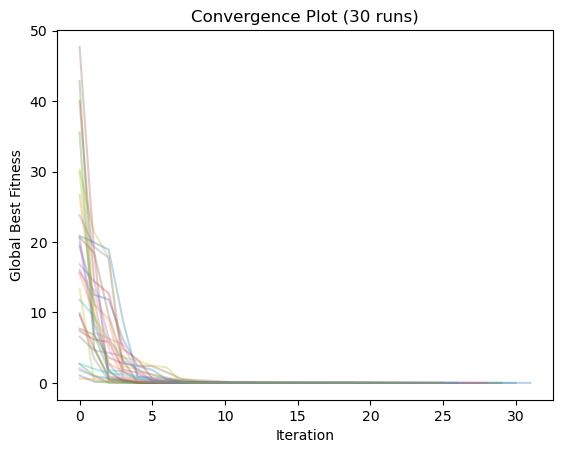

Number of iterations for 2 Sphere over 30 runs:
Max iterations: 68
Min iterations 44
Mean iterations 56.233333333333334
Final fitness stats for 10D Sphere over 30 runs:
Mean: 8.2e-09
Median: 8.2e-09
Best: 4.8e-09
Worst: 9.9e-09
Std Dev: 1.4e-09
Success Rate: 1.0 (100.0%) 


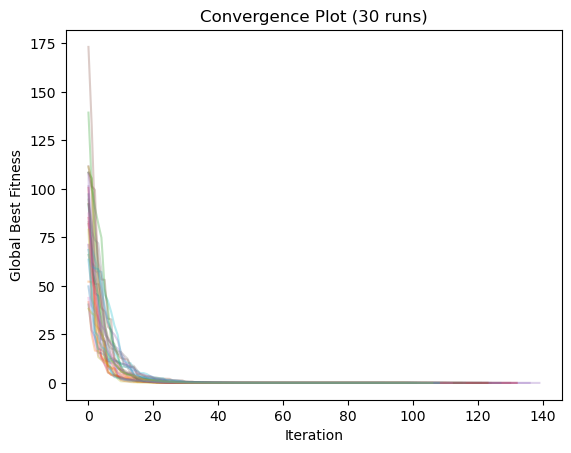

Number of iterations for 10 Sphere over 30 runs:
Max iterations: 195
Min iterations 148
Mean iterations 168.26666666666668
Final fitness stats for 30D Sphere over 30 runs:
Mean: 3.5e+00
Median: 2.5e-06
Best: 9.3e-09
Worst: 2.6e+01
Std Dev: 8.9e+00
Success Rate: 0.06666666666666667 (6.666666666666667%) 


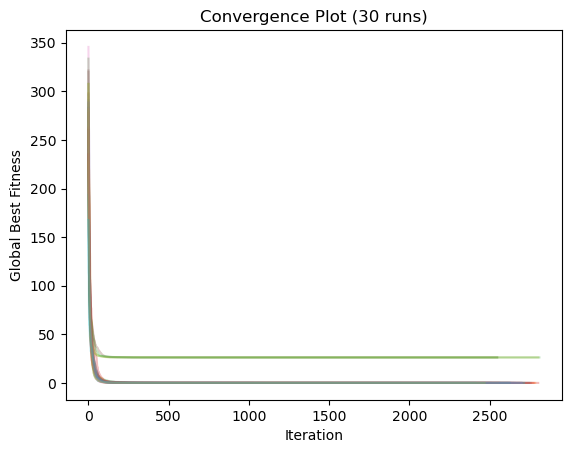

Number of iterations for 30 Sphere over 30 runs:
Max iterations: 1000
Min iterations 542
Mean iterations 981.9333333333333


In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-8, k_clusters = 3, function = sphere):

    
    bounds = [(-5.12, 5.12)] * n_dim  


    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Sphere over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Sphere over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs

all_runs_2D = run_pso_experiments(n_dim=2, function=sphere)
all_runs_10D = run_pso_experiments(n_dim=10, function=sphere, max_iter = 500)
#all_runs_30D = run_pso_experiments(n_dim=30, swarm_size = 50, function=sphere, k_clusters = 13, max_iter = 1000)
#all_runs_30D = run_pso_experiments(n_dim=30, swarm_size = 50, function=sphere, k_clusters = 6, max_iter = 1000)
all_runs_30D = run_pso_experiments(n_dim=30, swarm_size = 50, function=sphere, max_iter = 1000)



# Rosenbrock Optimization 

Final fitness stats for 2D Rosenbrock over 30 runs:
Mean: 1.6e-01
Median: 5.9e-09
Best: 1.9e-10
Worst: 4.7e+00
Std Dev: 8.4e-01
Success Rate: 0.9 (90.0%) 


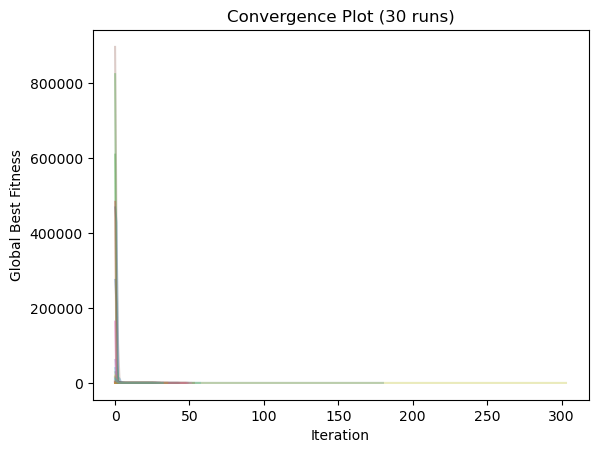

Number of iterations for 2 Rosenbrock over 30 runs:
Max iterations: 300
Min iterations 156
Mean iterations 202.73333333333332
Final fitness stats for 10D Rosenbrock over 30 runs:
Mean: 1.2e+01
Median: 5.1e+00
Best: 2.7e-02
Worst: 9.3e+01
Std Dev: 2.1e+01
Success Rate: 0.0 (0.0%) 


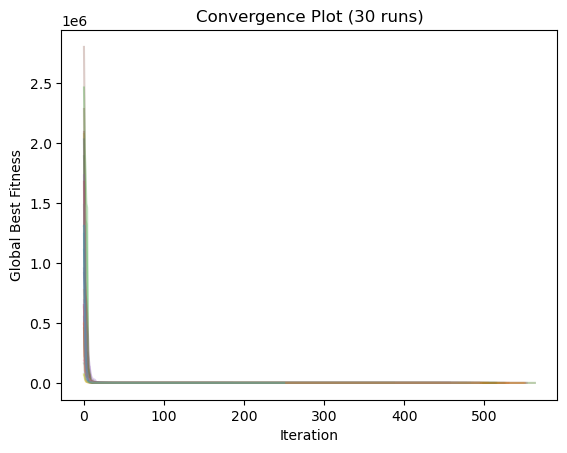

Number of iterations for 10 Rosenbrock over 30 runs:
Max iterations: 500
Min iterations 500
Mean iterations 500.0
Final fitness stats for 30D Rosenbrock over 30 runs:
Mean: 2.8e+02
Median: 7.9e+01
Best: 1.6e+01
Worst: 2.5e+03
Std Dev: 5.3e+02
Success Rate: 0.0 (0.0%) 


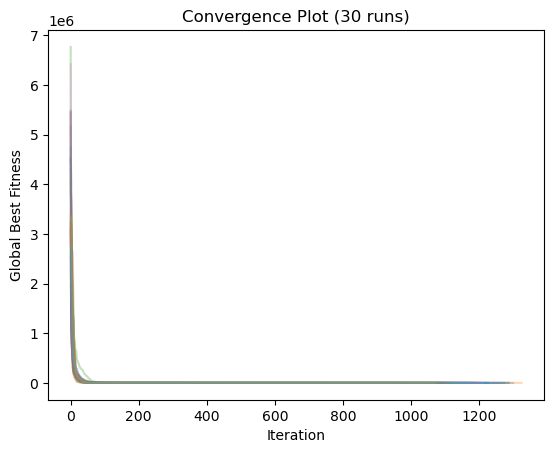

Number of iterations for 30 Rosenbrock over 30 runs:
Max iterations: 1000
Min iterations 1000
Mean iterations 1000.0


In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-8, k_clusters = 3, function = rosenbrock, exp_coef = 1, contr_coef = 0.5):

    
    bounds = [(-5.0, 10.0)] * n_dim  

    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters, exp_coef = exp_coef, contr_coef = contr_coef)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Rosenbrock over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Rosenbrock over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs


all_runs_2D = run_pso_experiments(n_dim=2, function=rosenbrock)
all_runs_10D = run_pso_experiments(n_dim=10, function=rosenbrock, max_iter = 500)
all_runs_30D = run_pso_experiments(n_dim=30, swarm_size = 50, function = rosenbrock, max_iter = 1000)



Final fitness stats for 2D Rosenbrock over 30 runs:
Mean: 5.2e-09
Median: 5.1e-09
Best: 2.5e-10
Worst: 9.8e-09
Std Dev: 2.8e-09
Success Rate: 1.0 (100.0%) 


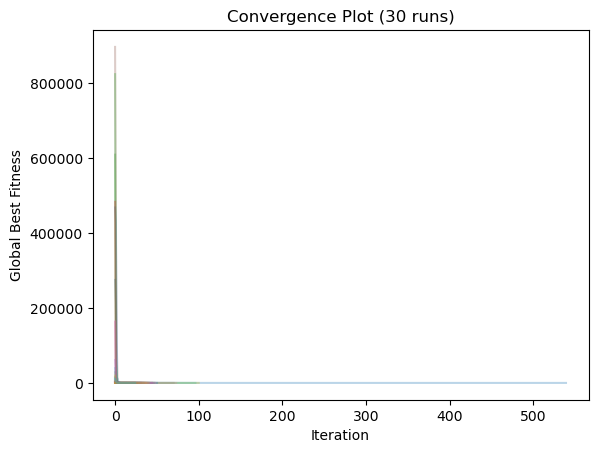

Number of iterations for 2 Rosenbrock over 30 runs:
Max iterations: 291
Min iterations 75
Mean iterations 104.66666666666667


In [114]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Test with other parameters to find success rate = 100

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-8, k_clusters = 3, function = rosenbrock, exp_coef = 1, contr_coef = 0.5):

    
    bounds = [(-5.0, 10.0)] * n_dim  

    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters, exp_coef = exp_coef, contr_coef = contr_coef)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Rosenbrock over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Rosenbrock over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs


all_runs_2D = run_pso_experiments(n_dim=2, function=rosenbrock, k_clusters = 1, contr_coef = 0.3)

Final fitness stats for 10D Rosenbrock over 30 runs:
Mean: 2.0e+03
Median: 4.0e+00
Best: 3.3e-06
Worst: 4.9e+04
Std Dev: 8.8e+03
Success Rate: 0.0 (0.0%) 


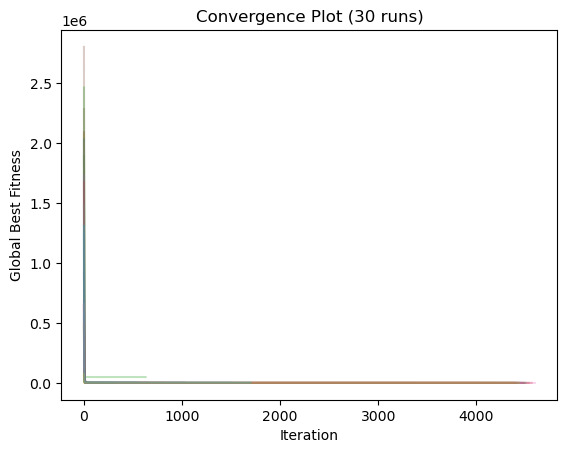

Number of iterations for 10 Rosenbrock over 30 runs:
Max iterations: 2400
Min iterations 2400
Mean iterations 2400.0


In [130]:
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-8, k_clusters = 3, function = rosenbrock, exp_coef = 1, contr_coef = 0.5):

    
    bounds = [(-5.0, 10.0)] * n_dim  

    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters, exp_coef = exp_coef, contr_coef = contr_coef)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Rosenbrock over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Rosenbrock over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs


all_runs_10D = run_pso_experiments(n_dim=10, function=rosenbrock, w = 0.5, c1 = 1.5, c2 = 2.5, contr_coef = 0.3, k_clusters=1,  max_iter = 2400)

# Rastigrin Optimization

Final fitness stats for 2D Rastigrin over 30 runs:
Mean: 6.6e-02
Median: 4.4e-05
Best: 7.1e-06
Worst: 9.9e-01
Std Dev: 2.5e-01
Success Rate: 0.9333333333333333 (93.33333333333333%) 


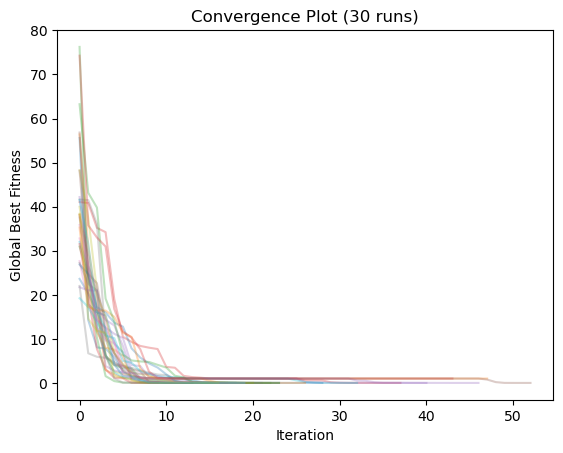

Number of iterations for 2 Rastigrin over 30 runs:
Max iterations: 300
Min iterations 39
Mean iterations 81.53333333333333
Final fitness stats for 10D Rastigrin over 30 runs:
Mean: 3.3e+01
Median: 3.0e+01
Best: 9.9e+00
Worst: 7.7e+01
Std Dev: 1.5e+01
Success Rate: 0.0 (0.0%) 


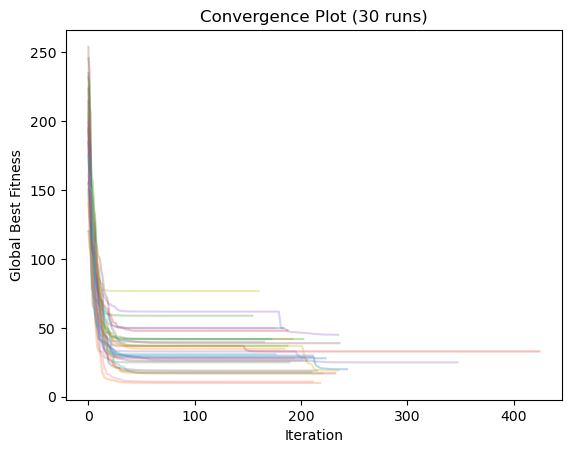

Number of iterations for 10 Rastigrin over 30 runs:
Max iterations: 500
Min iterations 500
Mean iterations 500.0
Final fitness stats for 30D Rastigrin over 30 runs:
Mean: 1.4e+02
Median: 1.4e+02
Best: 9.3e+01
Worst: 2.0e+02
Std Dev: 2.8e+01
Success Rate: 0.0 (0.0%) 


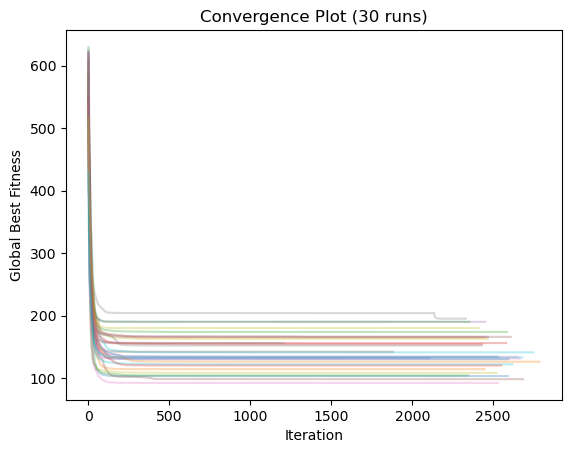

Number of iterations for 30 Rastigrin over 30 runs:
Max iterations: 1000
Min iterations 1000
Mean iterations 1000.0


In [41]:
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-4, k_clusters = 3, function = rastigrin):

    
    bounds = [(-5.12, 5.12)] * n_dim  

    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Rastigrin over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Rastigrin over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs

all_runs_2D = run_pso_experiments(n_dim = 2, function = rastigrin)
all_runs_10D = run_pso_experiments(n_dim = 10, function = rastigrin, max_iter = 500)
all_runs_30D = run_pso_experiments(n_dim = 30, swarm_size = 50, function = rastigrin, max_iter = 1000)



Final fitness stats for 10D Rastigrin over 30 runs:
Mean: 1.9e+01
Median: 2.5e+01
Best: 8.3e-05
Worst: 5.8e+01
Std Dev: 1.9e+01
Success Rate: 0.03333333333333333 (3.3333333333333335%) 


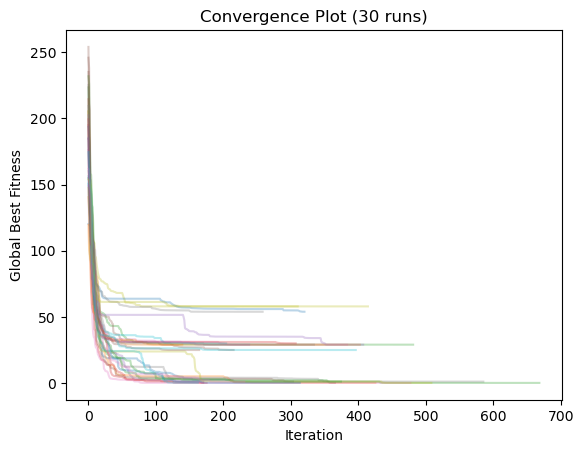

Number of iterations for 10 Rastigrin over 30 runs:
Max iterations: 3000
Min iterations 2959
Mean iterations 2998.633333333333


In [131]:
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-4, k_clusters = 3, function = rastigrin):

    
    bounds = [(-5.12, 5.12)] * n_dim  

    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Rastigrin over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Rastigrin over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs

#all_runs_2D = run_pso_experiments(n_dim = 2, function = rastigrin)
all_runs_10D = run_pso_experiments(n_dim = 10, w = 0.9, c1 = 3.0, c2 = 1.5, function = rastigrin, max_iter = 3000)
#all_runs_30D = run_pso_experiments(n_dim = 30, swarm_size = 50, function = rastigrin, max_iter = 1000)



# Ackley Optimization

Final fitness stats for 2D Ackley over 30 runs:
Mean: 7.4e-05
Median: 8.4e-05
Best: 2.5e-05
Worst: 9.8e-05
Std Dev: 2.2e-05
Success Rate: 1.0 (100.0%) 


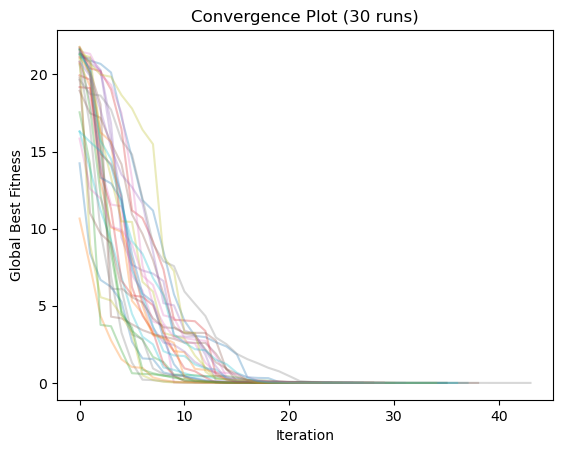

Number of iterations for 2 Ackley over 30 runs:
Max iterations: 87
Min iterations 64
Mean iterations 78.6
Final fitness stats for 10D Ackley over 30 runs:
Mean: 8.6e-01
Median: 5.8e-01
Best: 7.3e-05
Worst: 3.2e+00
Std Dev: 9.5e-01
Success Rate: 0.4666666666666667 (46.666666666666664%) 


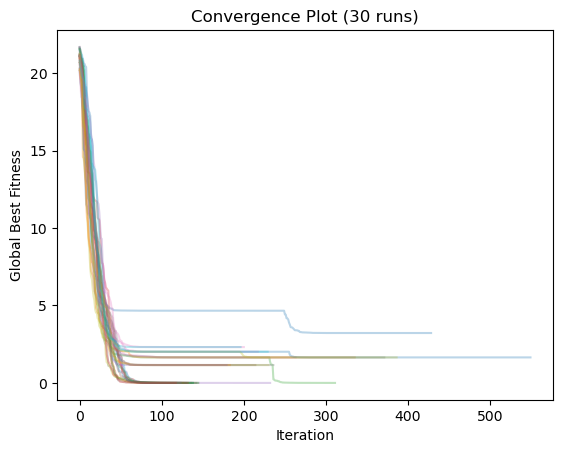

Number of iterations for 10 Ackley over 30 runs:
Max iterations: 500
Min iterations 189
Mean iterations 361.2
Final fitness stats for 30D Ackley over 30 runs:
Mean: 8.9e+00
Median: 6.2e+00
Best: 3.0e+00
Worst: 1.8e+01
Std Dev: 5.2e+00
Success Rate: 0.0 (0.0%) 


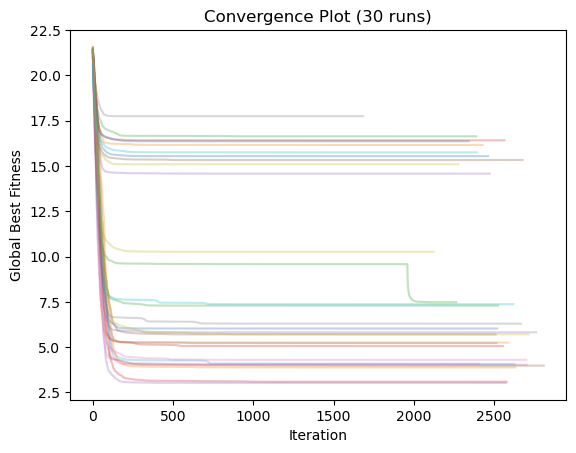

Number of iterations for 30 Ackley over 30 runs:
Max iterations: 1000
Min iterations 1000
Mean iterations 1000.0


In [42]:
import numpy as np
import random
import matplotlib.pyplot as plt

def run_pso_experiments(n_dim = 2, swarm_size = 30, max_iter = 300, 
                        w = 0.7, c1 = 1.5, c2 = 1.5, n_runs = 30, 
                        threshold = 1e-4, k_clusters = 3, function = ackley):

    
    bounds = [(-32.786, 32.786)] * n_dim  

    all_runs = []
    results = []
    with multiprocessing.Pool(processes=pool_size) as pool:
        for run in range(n_runs):
            random.seed(run)

            pso = PSO_ND(num_dim = n_dim, function = function, bounds = bounds,
                    swarm_size = swarm_size, maxiter = max_iter,
                    w = w, c1 = c1, c2 = c2,
                    early_stop_threshold=threshold,
                    k_clusters = k_clusters)
            res = pool.apply_async(run_pso, (pso,run,))
            results.append(res)

        for result in [res.get() for res in results]:
            run_result = {
                'final_fitness': result.err_best_g,
                'best_position': result.pos_best_g,
                'iterations': result.iterations,
                'fitness_history': result.err_best_g_history,
                'evaluations': result.iterations * swarm_size,
                'pbest_history': result.pbest_history
            }
            all_runs.append(run_result)

   # Compute Statistics for Final Fitnesses
    final_fitnesses = np.array([run['final_fitness'] for run in all_runs]) # Collect final fitnesses for each run
    mean_final_fitness = np.mean(final_fitnesses) # Mean of final fitnesses
    median_final_fitness = np.median(final_fitnesses) # Median of final fitnesses
    best_final_fitness = np.min(final_fitnesses) # Best final fitness
    worst_final_fitness = np.max(final_fitnesses) # Worst final fitness
    std_dev_final_fitness = np.std(final_fitnesses) # Standard deviation 
    success_rate_final_fitness = np.sum(final_fitnesses <= threshold)/n_runs # Success rate: Number of sucessful runs/ no. of runs
    
    # Print Statistics
    print(f"Final fitness stats for {n_dim}D Ackley over 30 runs:")
    print(f"Mean: {mean_final_fitness:.1e}")
    print(f"Median: {median_final_fitness:.1e}")
    print(f"Best: {best_final_fitness:.1e}")
    print(f"Worst: {worst_final_fitness:.1e}")
    print(f"Std Dev: {std_dev_final_fitness:.1e}")
    print(f"Success Rate: {success_rate_final_fitness} ({success_rate_final_fitness*100}%) ")
    
    # Convergence Plot for All Runs - Fitness history of all runs
    # Since early stopping is added, no. of iterations can vary between runs
    # Therefore plot each run individually
    for run in all_runs:
        plt.plot(run['fitness_history'], alpha=0.3)
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Fitness')
    plt.title('Convergence Plot (30 runs)')
    plt.show()
    
    # Iterations
    
    no_iterations =  np.array([run['iterations'] for run in all_runs]) 
    min_iterations = np.min(no_iterations) # Min iterations
    max_iterations = np.max(no_iterations) # Max iterations
    mean_iterations = np.mean(no_iterations) # Mean iterations
    
    print(f"Number of iterations for {n_dim} Ackley over 30 runs:")
    print("Max iterations:", max_iterations)
    print("Min iterations", min_iterations)
    print("Mean iterations", mean_iterations)

    return all_runs

all_runs_2D = run_pso_experiments(n_dim = 2, function = ackley)
all_runs_10D = run_pso_experiments(n_dim = 10, function = ackley, max_iter = 500)
all_runs_30D = run_pso_experiments(n_dim = 30, swarm_size = 50, function = ackley, max_iter = 1000)

